## Откроем файл с данными и изучим общую информацию

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('games.csv')

Выведем общую информацию для DataFrame

array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

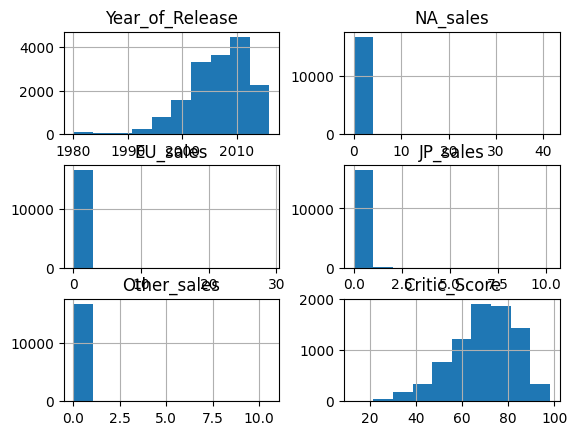

In [3]:
games.hist()

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,1996.0,2003.0,2007.00,2010.00,2015.00,2016.0000,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.0,0.08,0.24,1.06,2.7900,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.0,0.02,0.11,0.62,1.9386,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.0,0.00,0.04,0.36,1.2686,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.0,0.01,0.03,0.20,0.6300,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,43.0,60.0,71.00,79.00,89.00,94.0000,98.00


Файл содержит информацию о 16715 играх. \
Описание данных\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.\
Видим некоторые проблемы в данных. Последовательно попробуем исправить.

## Подготовим данные для анализа

Меняем названия столбцов (приводим к нижнему регистру)

In [6]:
games.columns = games.columns.str.lower()

Обрабатываем пропуски в данных

Смотрим общее количество пропусков в датасете

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Смотрим, что за пропуски в столбце 'name'

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выяснить, что за игры, невозможно. Кроме того, всего 2 строки из 16715. Удаляем.

In [9]:
games = games.dropna(subset=['name']).reset_index(drop=True)

Смотрим, что за пропуски в столбце 'year_of_release'

In [10]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим наличие года релиза на других платформах.

In [11]:
games[games['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2605,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12028,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13085,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [12]:
games[games['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Причиной может быть как технические ошибки в данных, так и невозможность определить точный год релиза. К примеру, Madden NFL 2004 вышел в августе 2003 г.(в США) и в сентябре 2003 г. (в Европе). FIFA Football 2004 вышел GC, PS1, PS2 и Xbox: 24 октября 2003 (в ЕС), 4 ноября 2003 (в США) GBA и Windows:4 ноября 2003 (в США), 7 ноября 2003 (в ЕС), N-Gage: 24 декабря 2003 (в ЕС),14 января 2004 (в США), Мобильный телефон:13 августа 2004 (в США). Удалить пустые - самое простое, однако оказалось, что пропуски в годе приходятся на платформы с наибольшей выручкой. Соответственно, лучший выход - заполнить пропуски значениями года выпуска на других платформах.

In [13]:
# Подавим предупреждение pandas.
# Это предупреждение возникает из-за наличия игр с пустым значением года релиза по всем платформам.
pd.options.mode.chained_assignment = None 

# Переберем циклом пустые значения года релиза и попробуем присвоить им минимальные значения 
# годов релиза игр на других платформах 
for i in games[games['year_of_release'].isna() == True].index:
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].min()
pd.options.mode.chained_assignment = None

Остальные пропущенные значения удалим.

In [14]:
games.drop(games[games['year_of_release'].isna()].index,inplace=True)

Удалять пропуски в других столбцах не будем, чтобы не искажать данные.

Преобразовываем данные в нужные типы

Приводим столбец "year_of_release" к целочисленному виду, т.к. год релиза не может быть дробным 

In [15]:
games['year_of_release'] = games['year_of_release'].astype(int)

Посмотрим на столбец "user_score". Значение указано как "object", что странно, т.к. рейтинг - это численная величина.

In [16]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим пропуски в данных, а также значение "tbd". Посмотрим, сколько значений "tbd":

In [17]:
games[games['user_score'] == 'tbd'].count()

name               2394
platform           2394
year_of_release    2394
genre              2394
na_sales           2394
eu_sales           2394
jp_sales           2394
other_sales        2394
critic_score       1069
user_score         2394
rating             2344
dtype: int64

Интернет утверждает, что значение "tbd" обозначает - To Be Determined, то есть "Будет определено". Это обозначение применяется,  когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Думаю, что это случается с малопопулярными играми. Фактически это значение NaN, к которому и приводим все значения "tbd".

In [18]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

Заменим пропуски в столбце rating значением 'Unknow'. 

In [19]:
games['rating'] = games['rating'].fillna(value='Unknow')

In [20]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknow


Пропуски в столбцах critic_score , user_score оставим незаполненными, поскольку их заполнение может исказить статистику. Данные оценки - дело весьма субъективное, зависит от множества факторов. 

Проверим на наличие дупликатов

In [21]:
games.duplicated().sum()

0

Добавим столбец со значениями суммарных продаж

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Вывод по этапу подготовки данных к анализу.
Заменены пропуски в столбце 'year_of_release'.
Пропуски в столбцах critic_score , user_score , rating оставили незаполненными, поскольку их заполнение может исказить статистику. Данные оценки - дело весьма субъективное, зависит от множества факторов.
Приведены значения к нужному типу.
Дупликатов не имеется.
Данные готовы для дальнейшего исследования.

Проверим корректность внесенных изменений

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16567 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [24]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
total_sales           0
dtype: int64

## Проводим исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [25]:
# посмотрим на топ годов релизов
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(15) 

year_of_release
2008    1441
2009    1430
2010    1269
2007    1202
2011    1153
2006    1018
2005     948
2002     845
2003     783
2004     764
2012     662
2015     606
2014     581
2013     548
2016     502
Name: name, dtype: int64

In [26]:
# посмотрим на аутсайдеров
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15) 

year_of_release
1994    122
1993     60
1981     46
1992     43
1991     42
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

Имеет смысл рассматривать статистику с 1994 года, т.к. количество выпущенных игр до этого года минимально

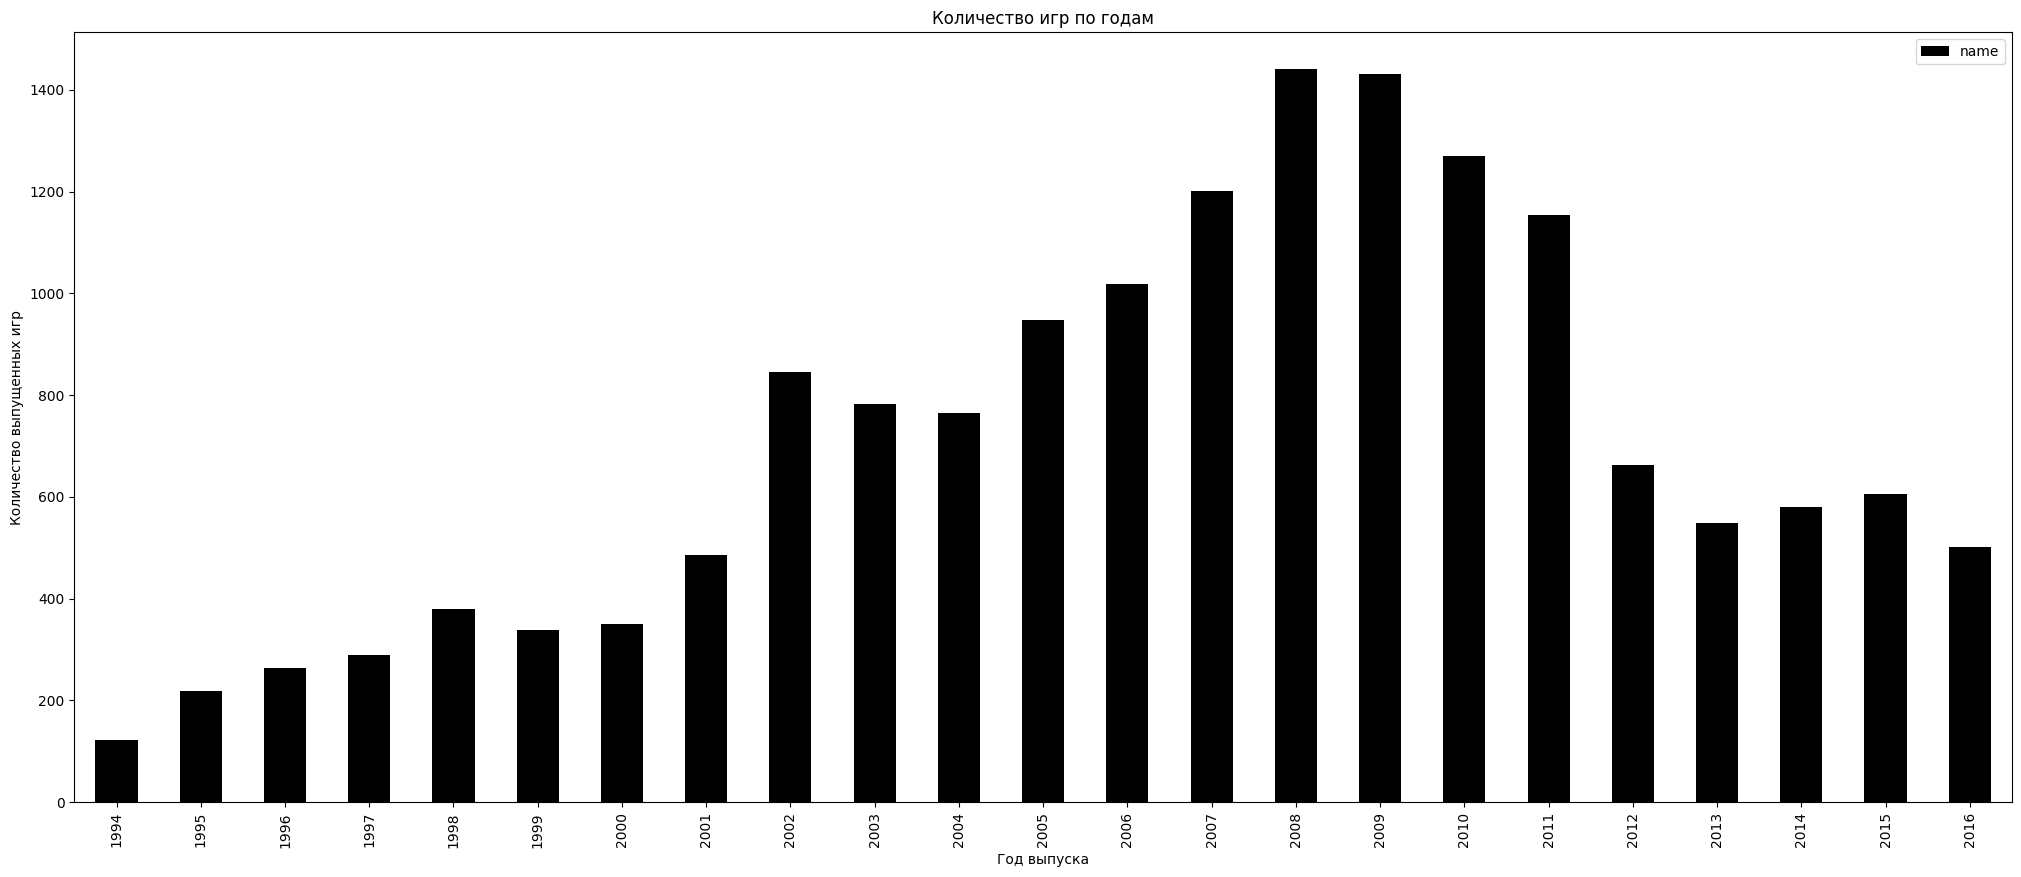

In [27]:
years_groupby = games.groupby('year_of_release').agg({'name':'count'})
years_groupby.loc[1994:].plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'k')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

Золотой век игровой индустрии - 2008, 2009 годы. С 1993 года количество игр непрерывно росло. Причиной взрывного роста, скорее всего, был выход приставок пятого поколения, а также выход в 3D. Новизна, качество игр, появление новых жанров, развитие новых технологий  - все это способствовало развитию индустрии. С 2009 года началось плавное снижение количества релизов. Объясняется это насыщением рынка, появлением новых платформ, таких как мобильные устройства, усложнение производственного процесса, выход издательств на уровень сверхприбылей, появление цифровой дистрибуции. Студии, которые не вышли за рамки нишевых, уже не были в состоянии производить и рекламировать свои проекты, а те что обзавелись именем, были скуплены издательствами, которые стали вкладывать больше денег в пиар, чем в разработку.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

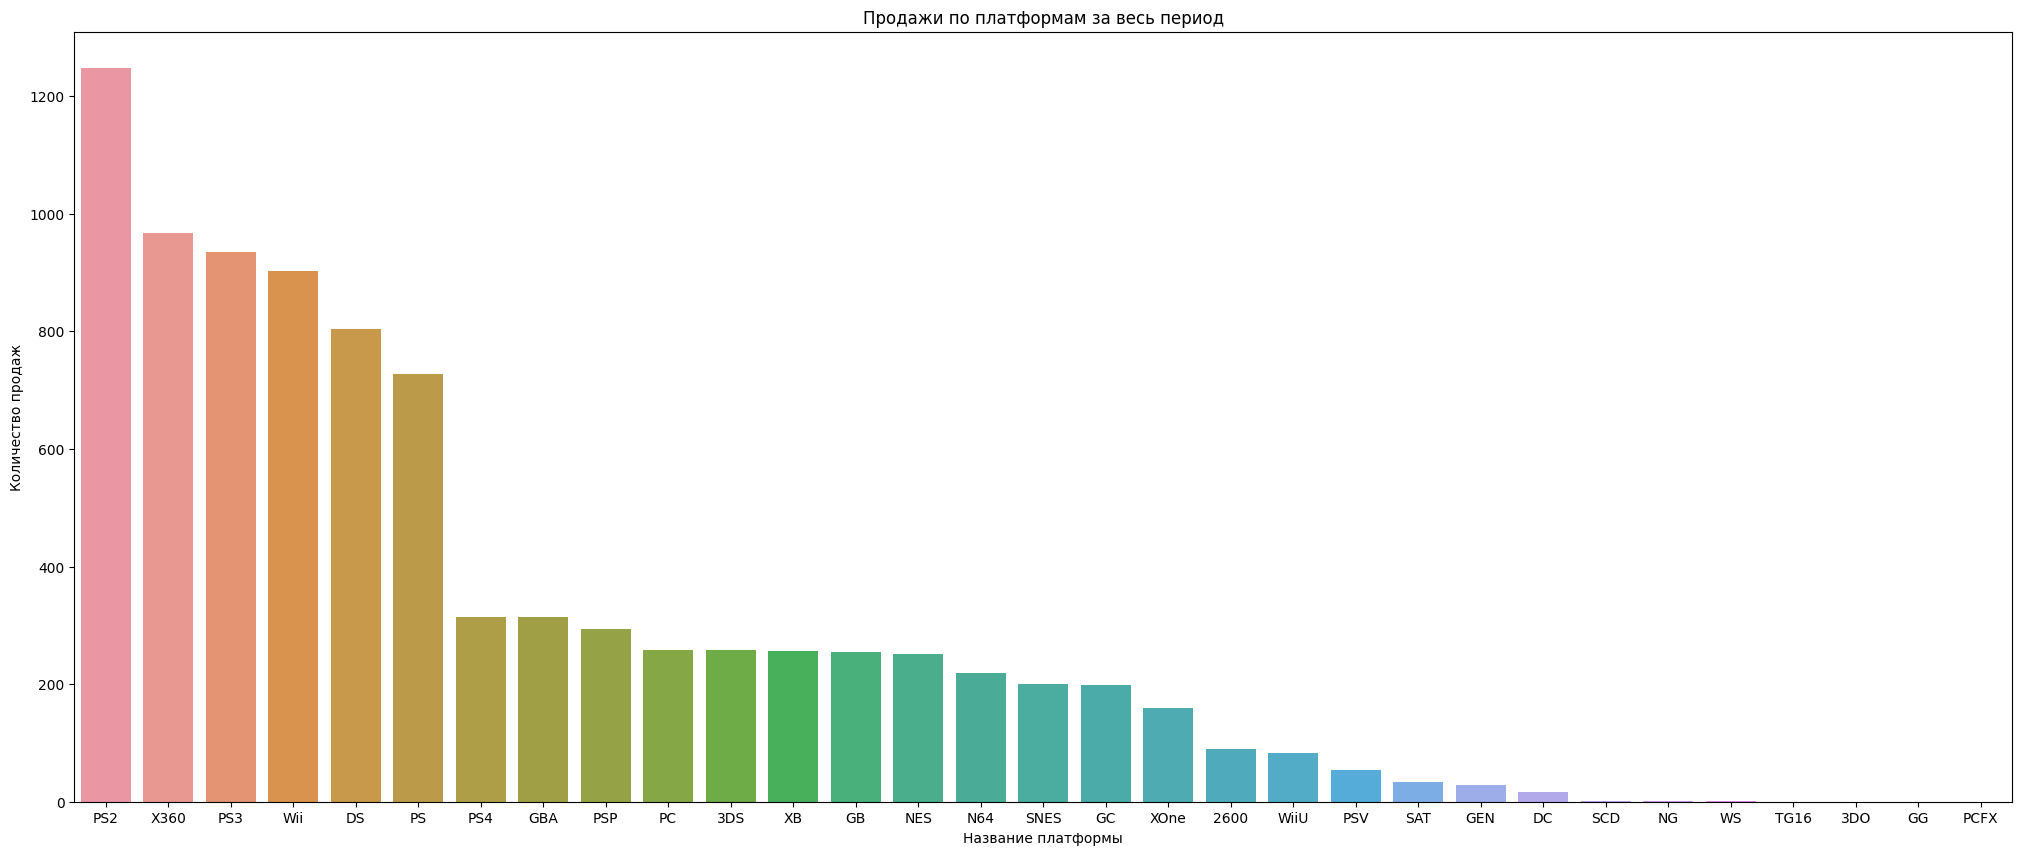

In [28]:
sales_on_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x=sales_on_platform.index, y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Мы видим топ6 платформ: PS2, X360, PS3, Wii, DS, PS, PS4.
Построим распределение топ6 платформ по годам.

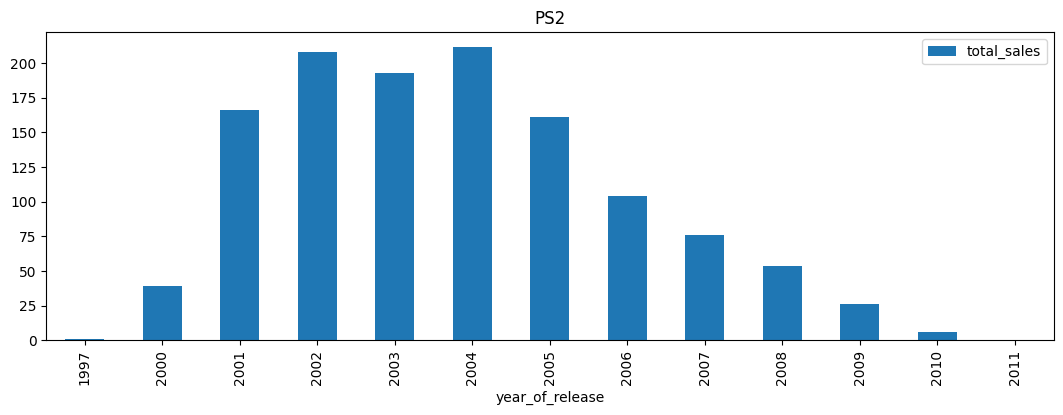

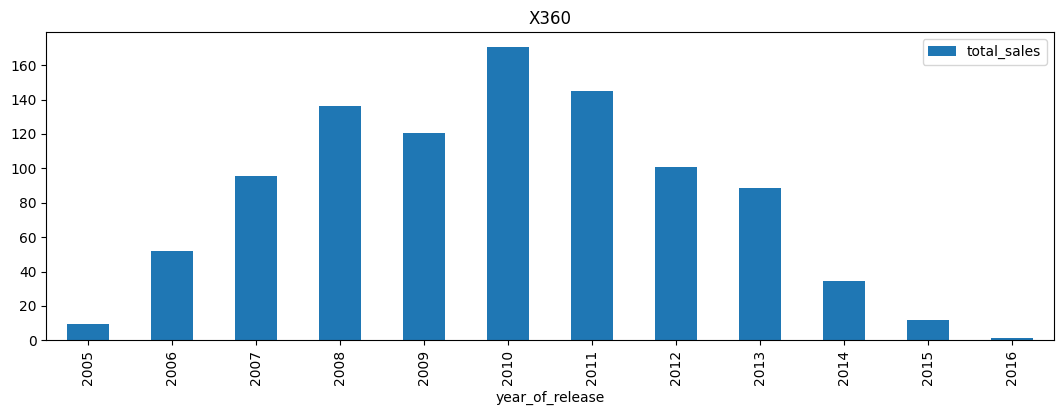

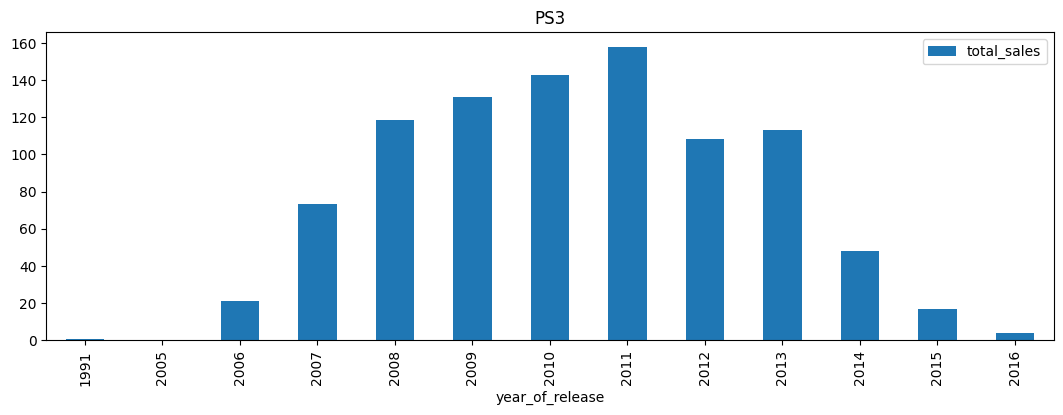

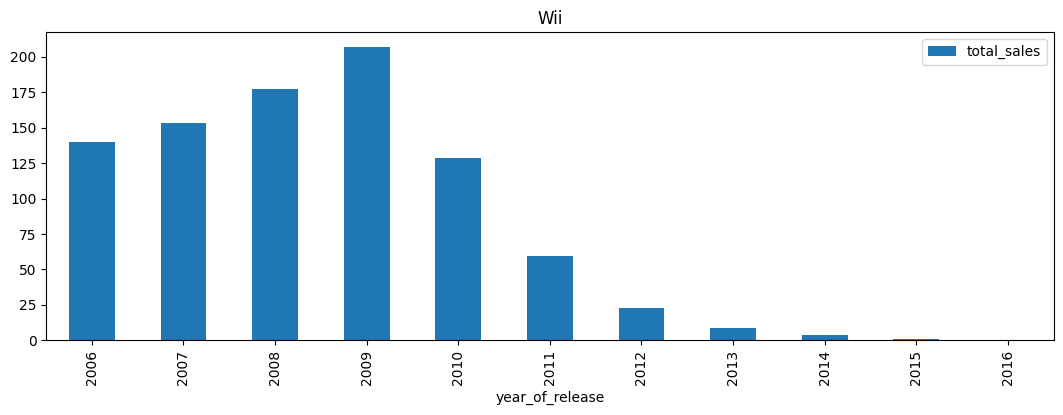

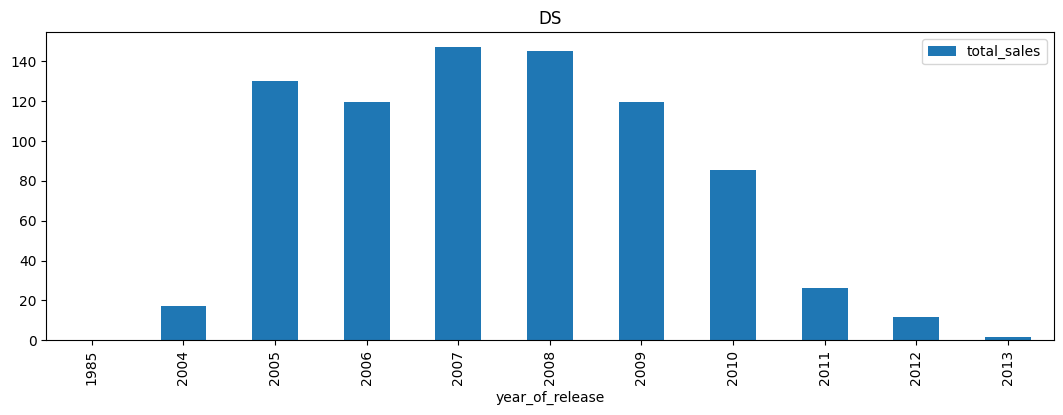

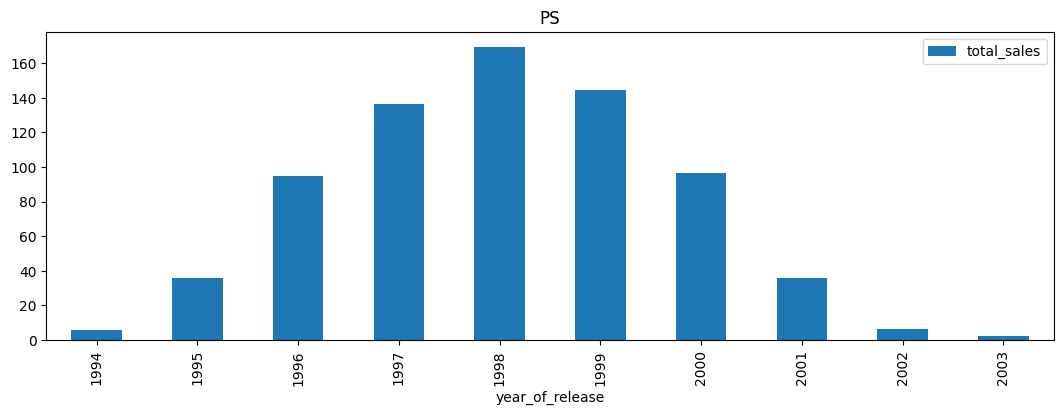

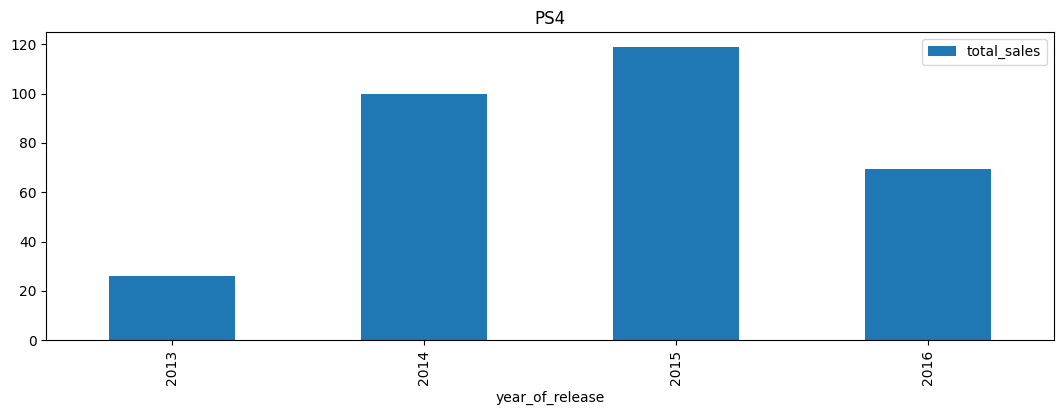

In [29]:
top_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']
for platform in top_platforms_list:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Характерным сроком жизни платформы является срок около 10 лет. К рассматриваемому 2016 году большинство наиболее популярных платформ практически прекратило свое существование, остальные находятся в конце своего жизненного пути. В дальнейшем анализе они нам не помогут. Актуальным периодом я бы установил период с 2012 по 2016 годы. Количество релизов стабилизировалось, появились новые платформы, которые набирают популярность, и в 2017 году к ним придет пик популярности. Исходя из графиков топ 6 платформ популярность платформы растет, достигая пика на 4-6 году существования, потом плавно снижается. 

Установим актуальный период для исследования

In [30]:
considered_period = games[games['year_of_release'] >= 2012].reset_index(drop=True)
considered_period.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknow,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknow,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknow,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Построим график продаж по платформам за период 2012 - 2016 год

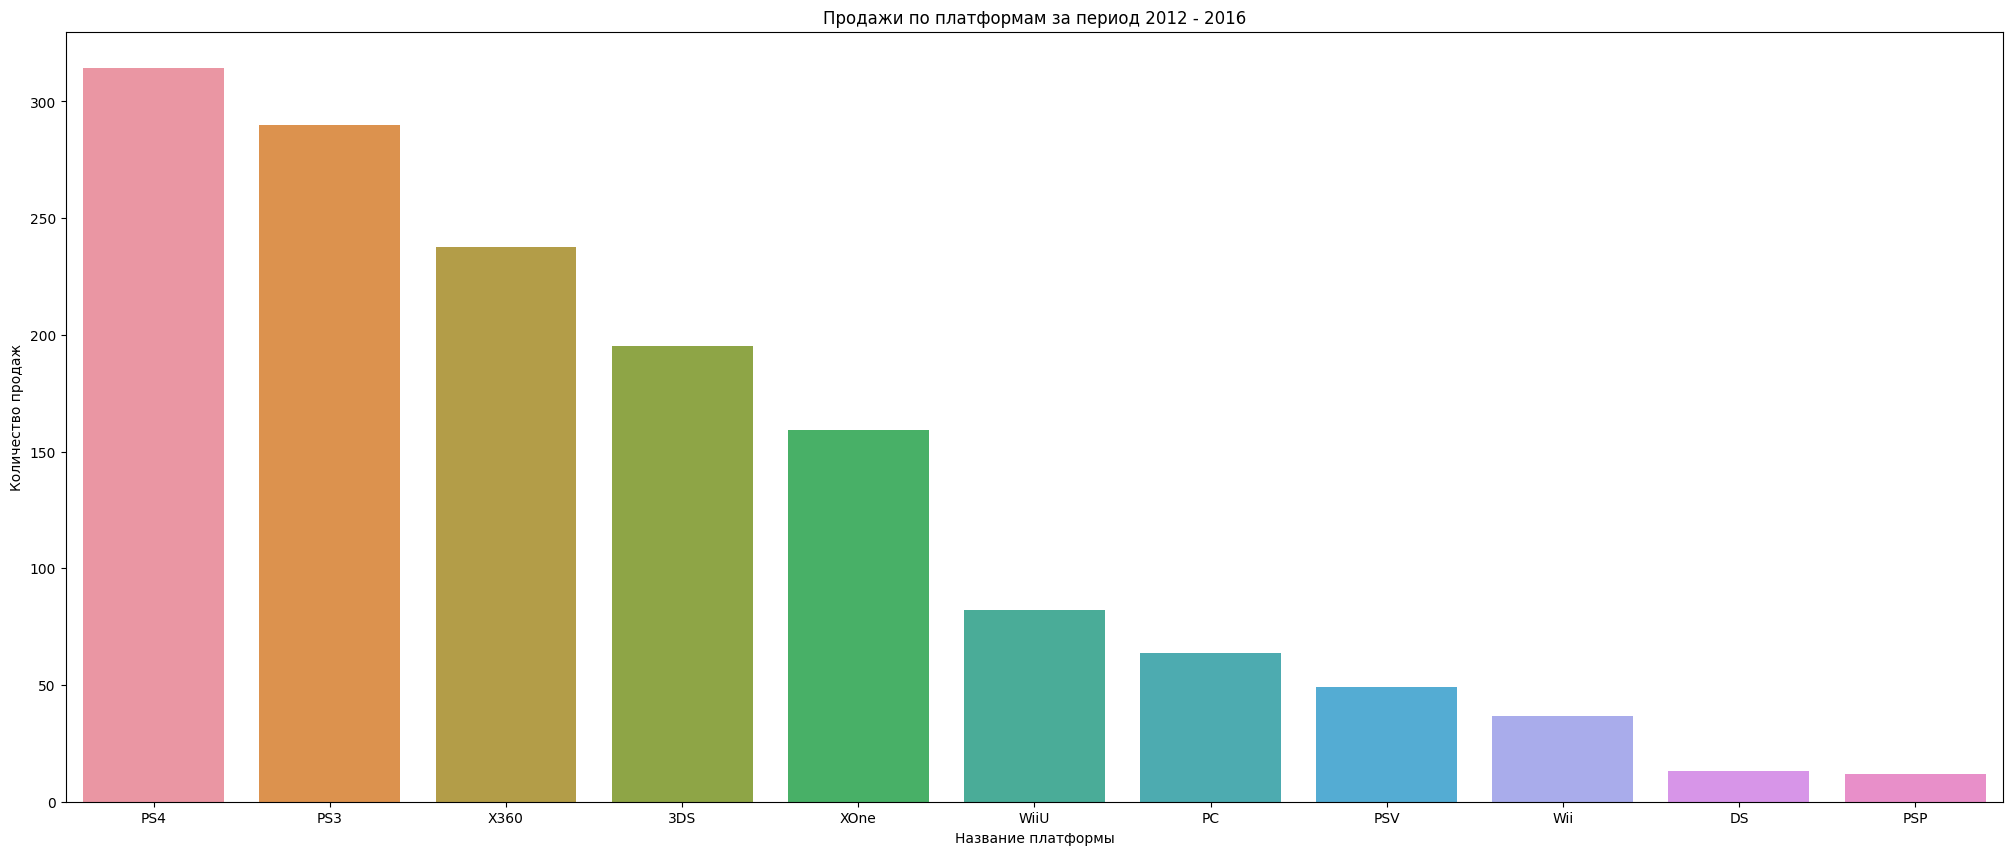

In [31]:
sales_on_platform_2016 = considered_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x=sales_on_platform_2016.index,y=sales_on_platform_2016['total_sales'])
plt.title("Продажи по платформам за период 2012 - 2016")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Исходя из предположения, что срок жизни платформы соcтавляет 10 лет, попробуем посмотреть на платформы "в самом рассвете сил".

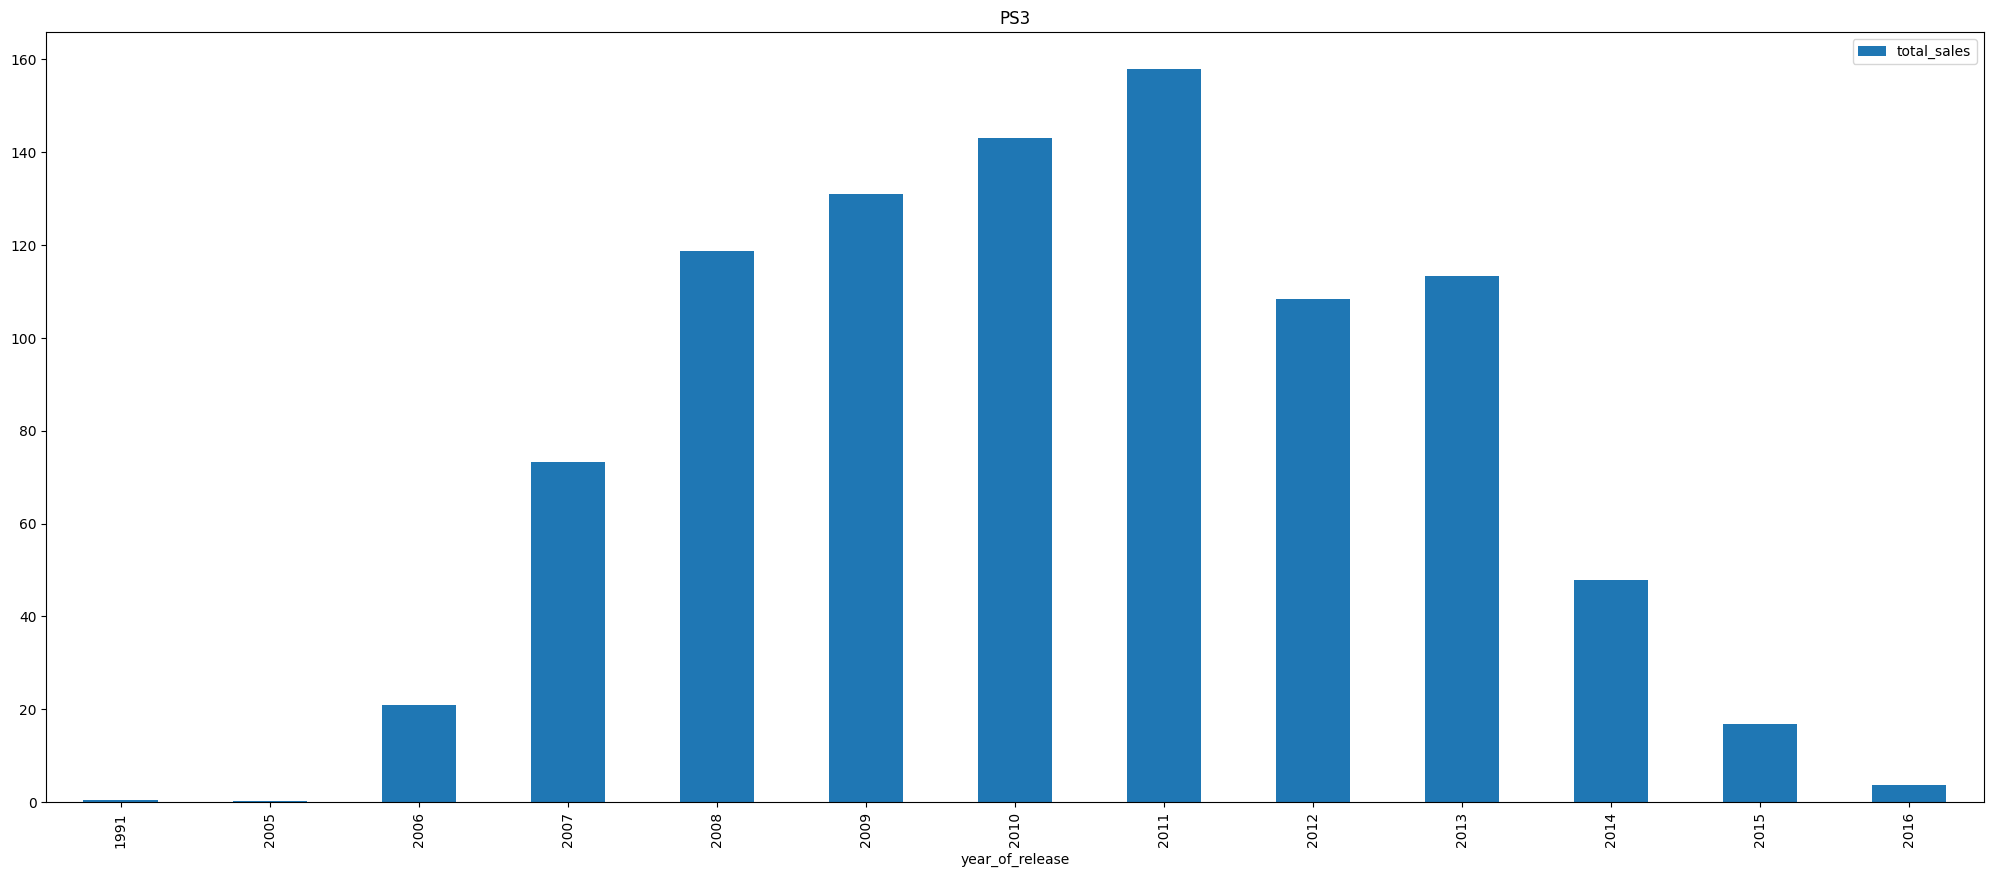

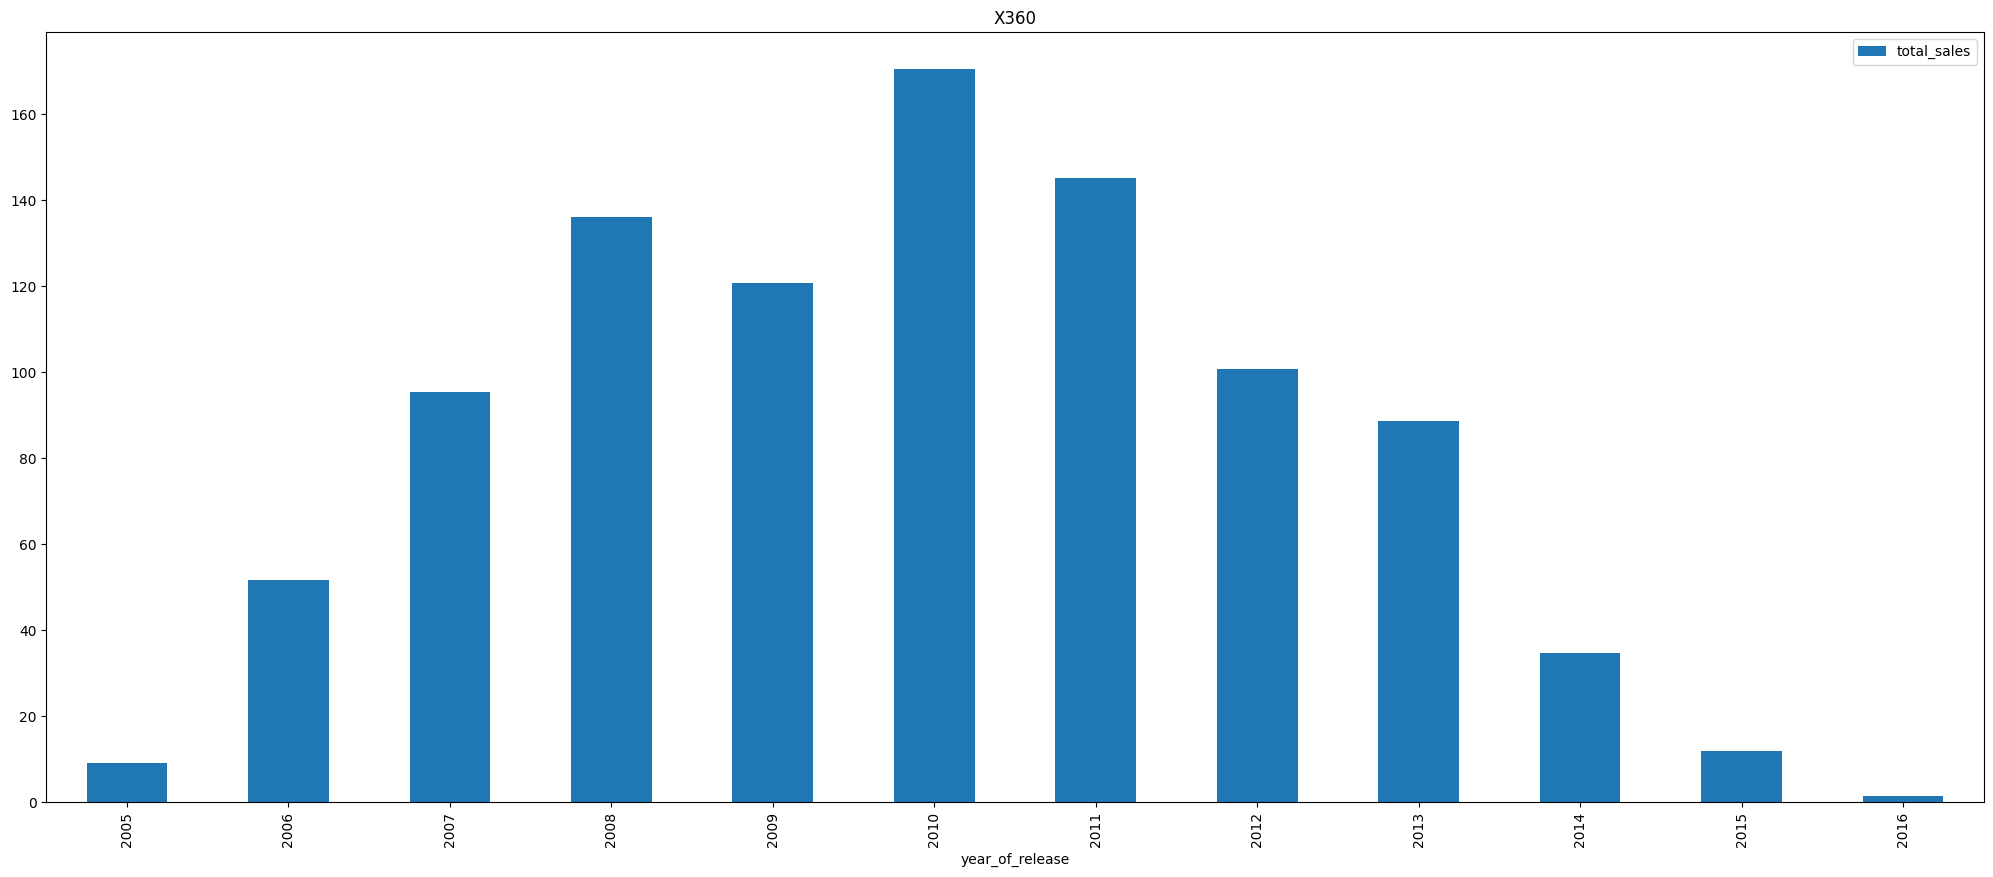

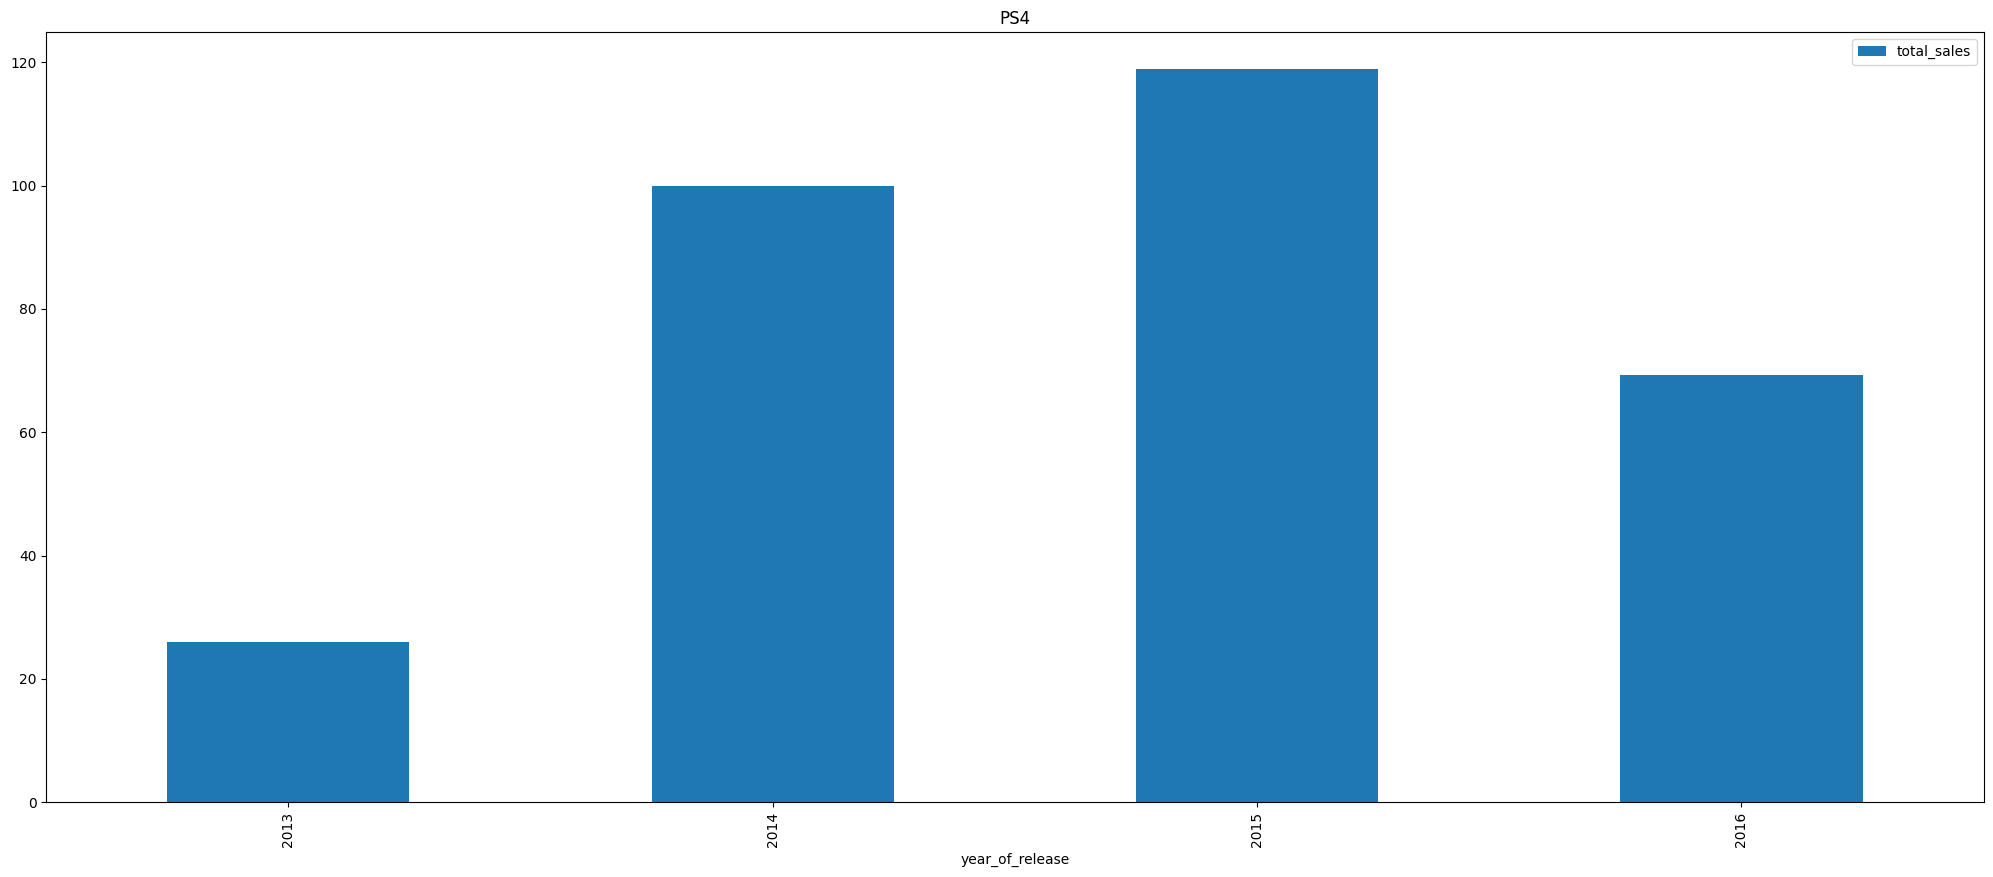

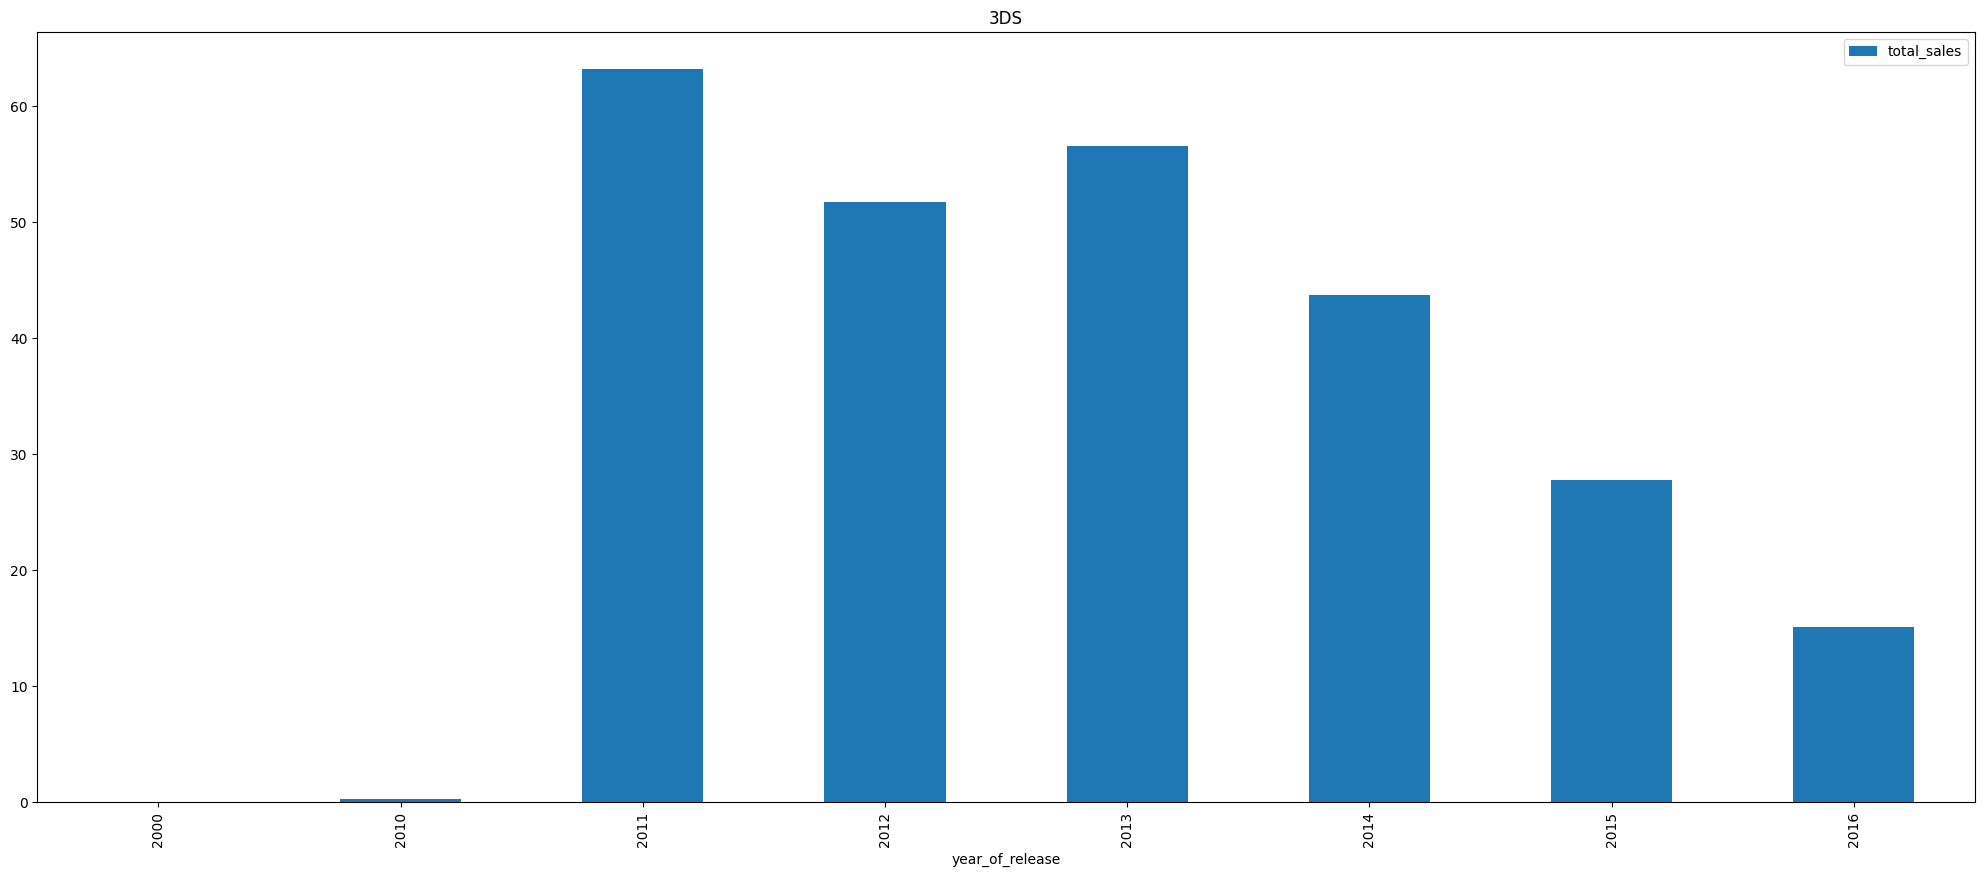

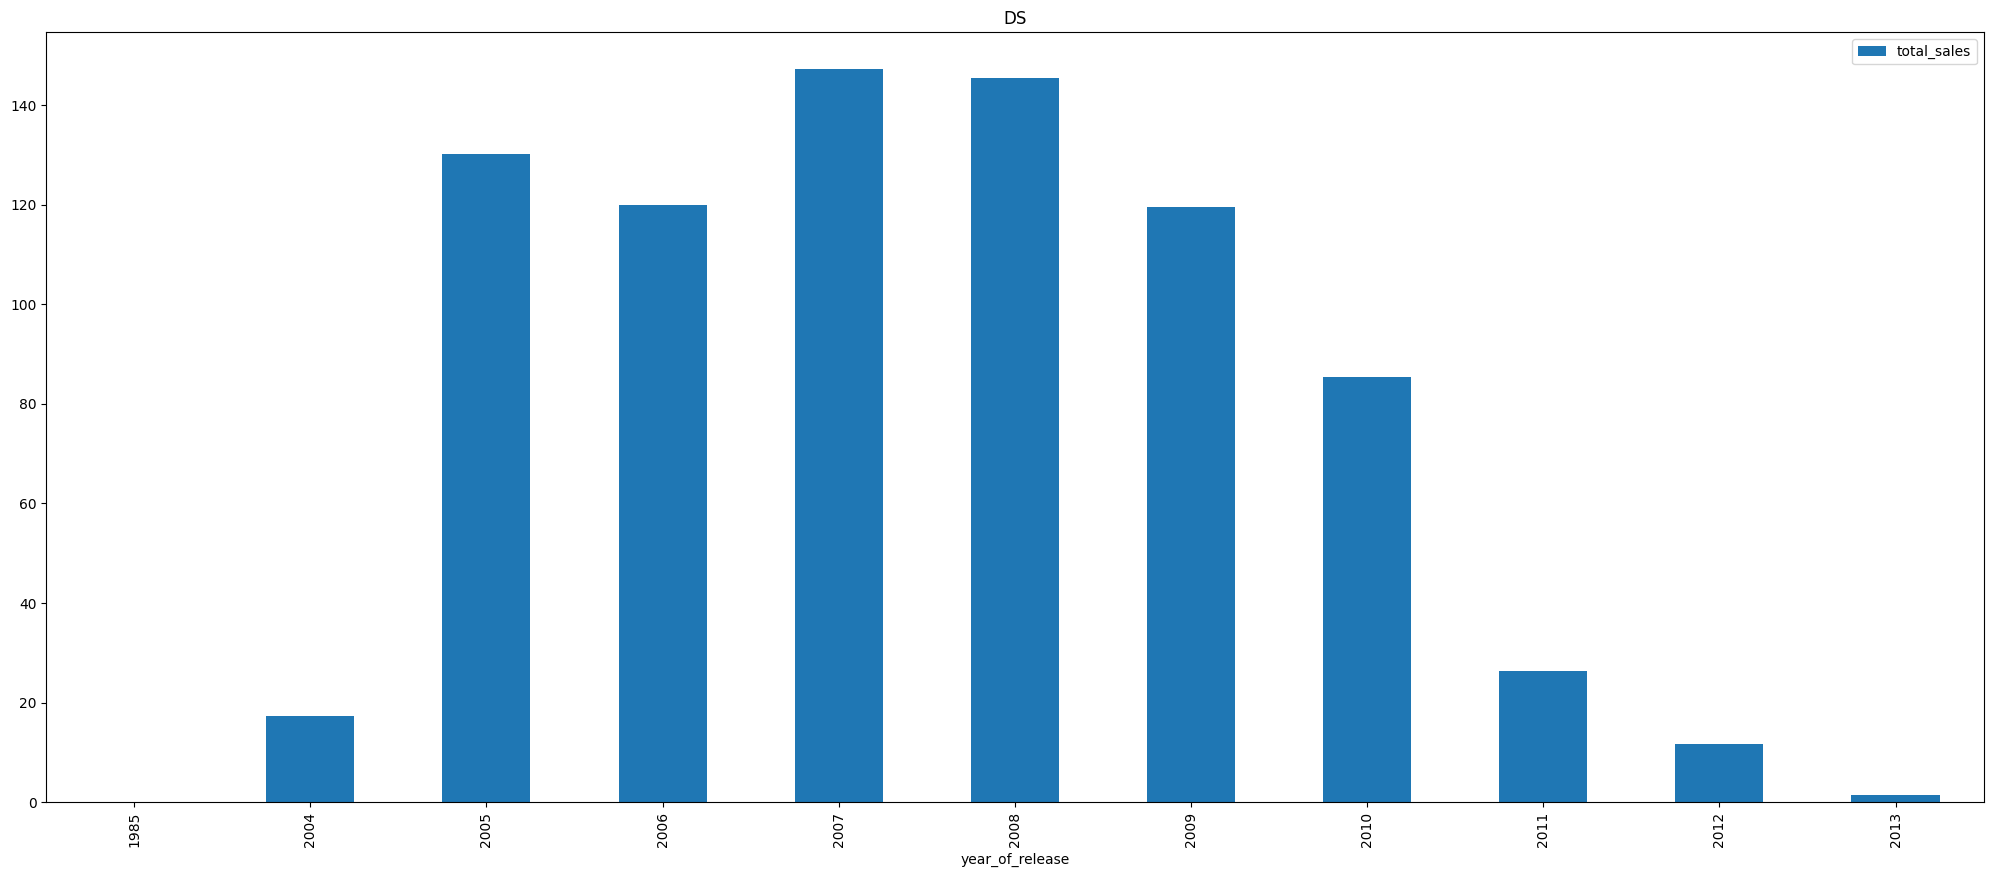

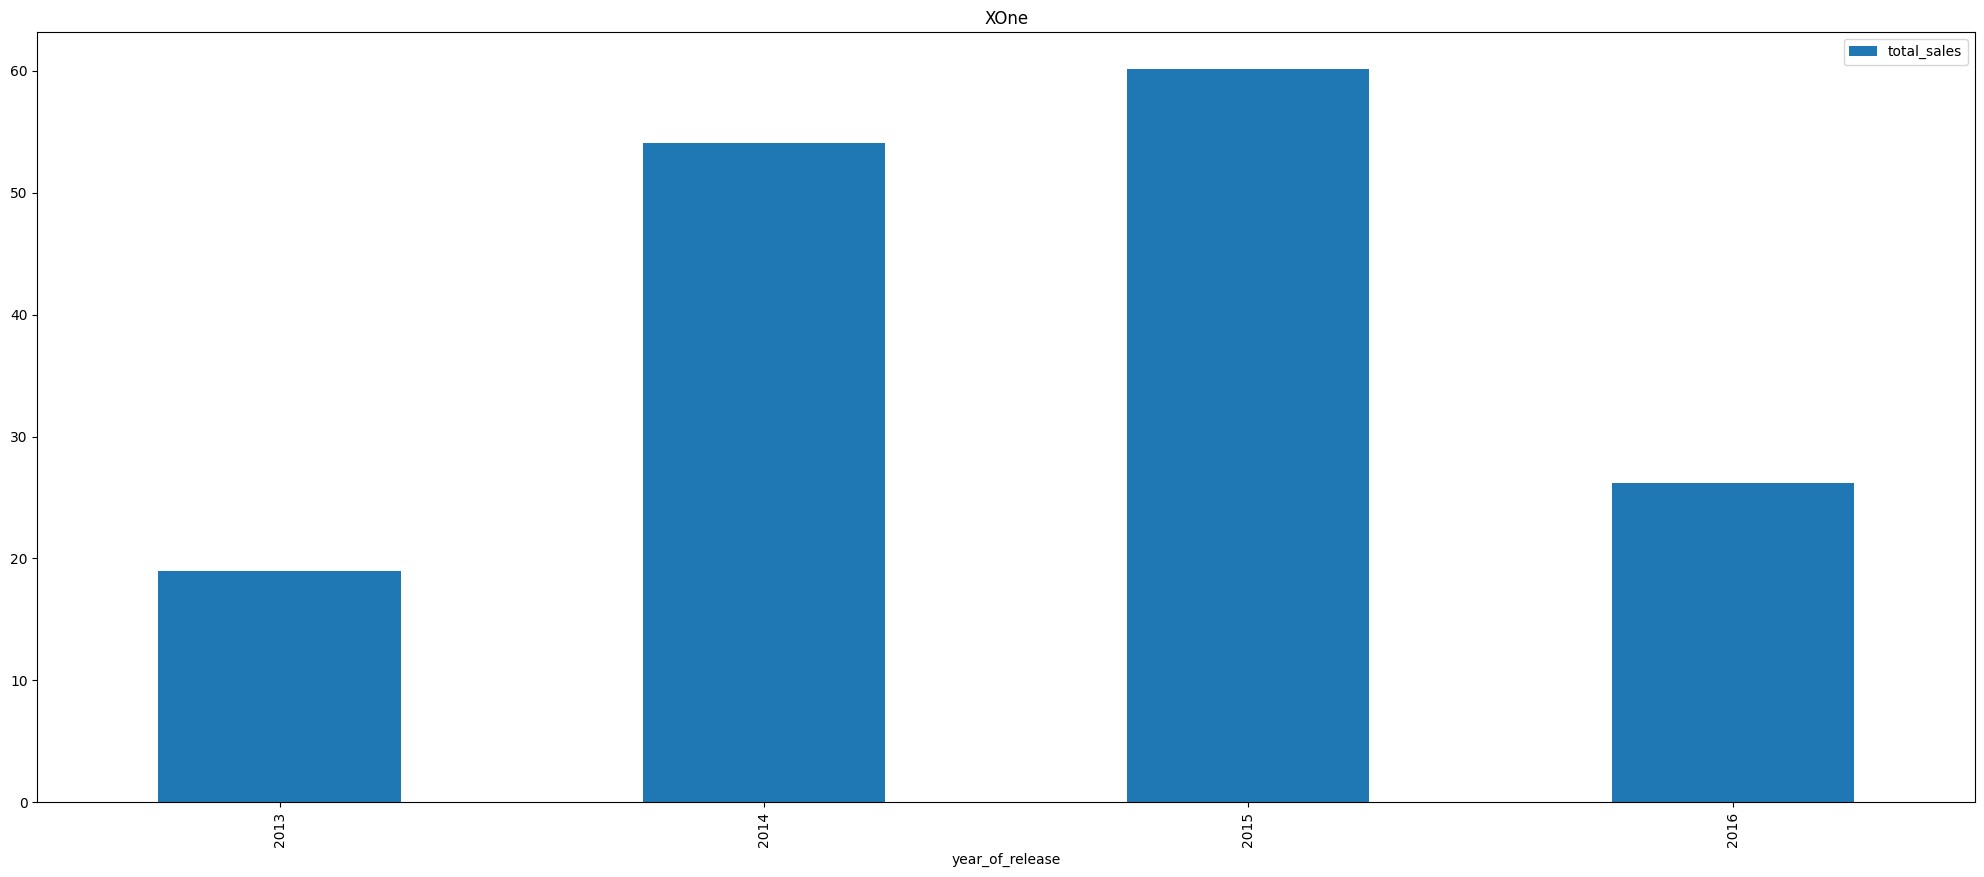

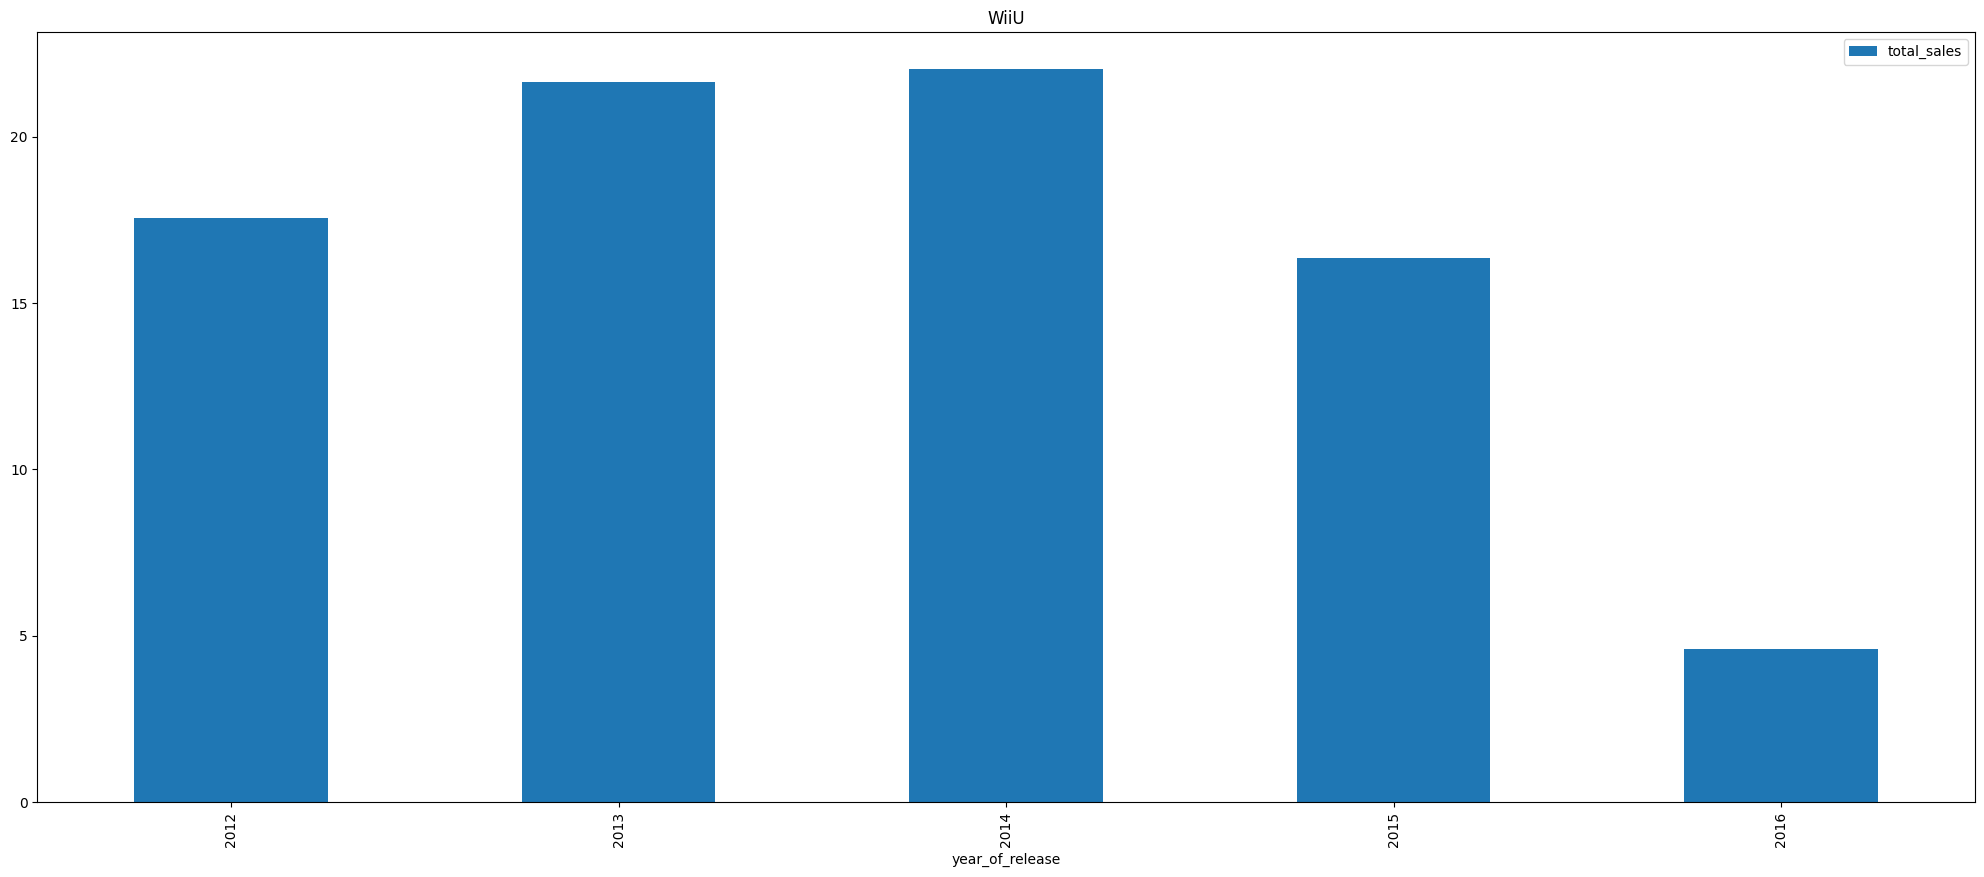

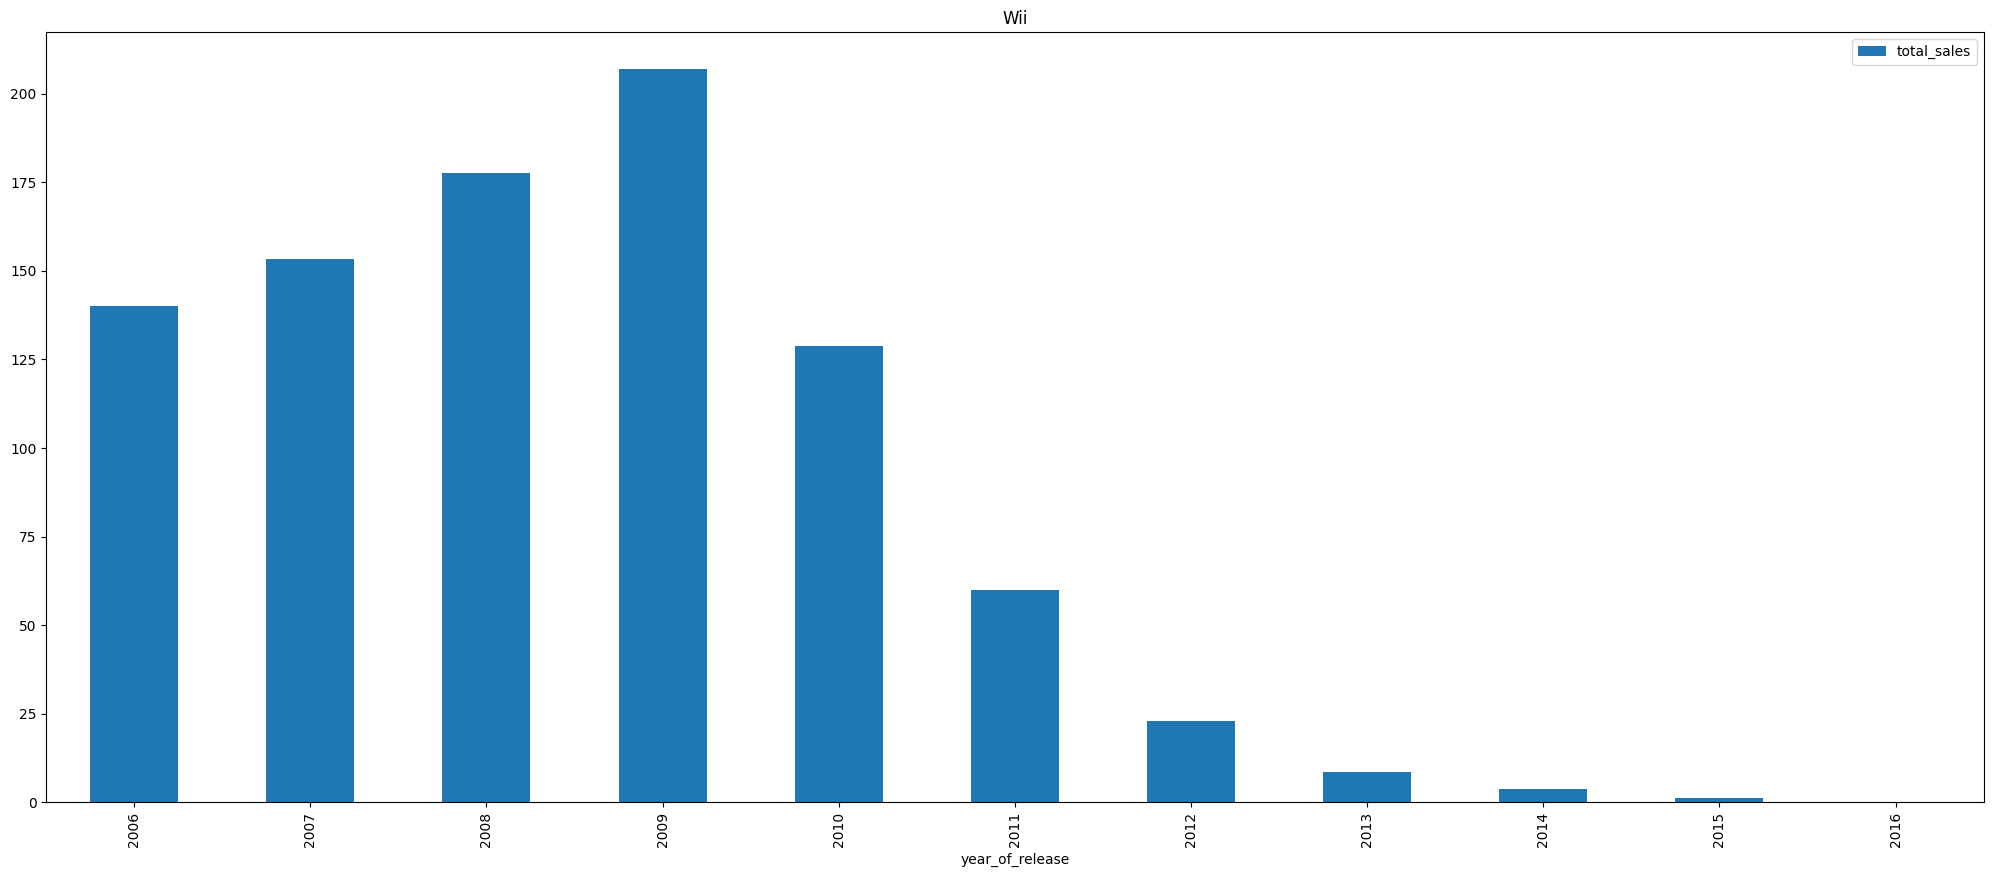

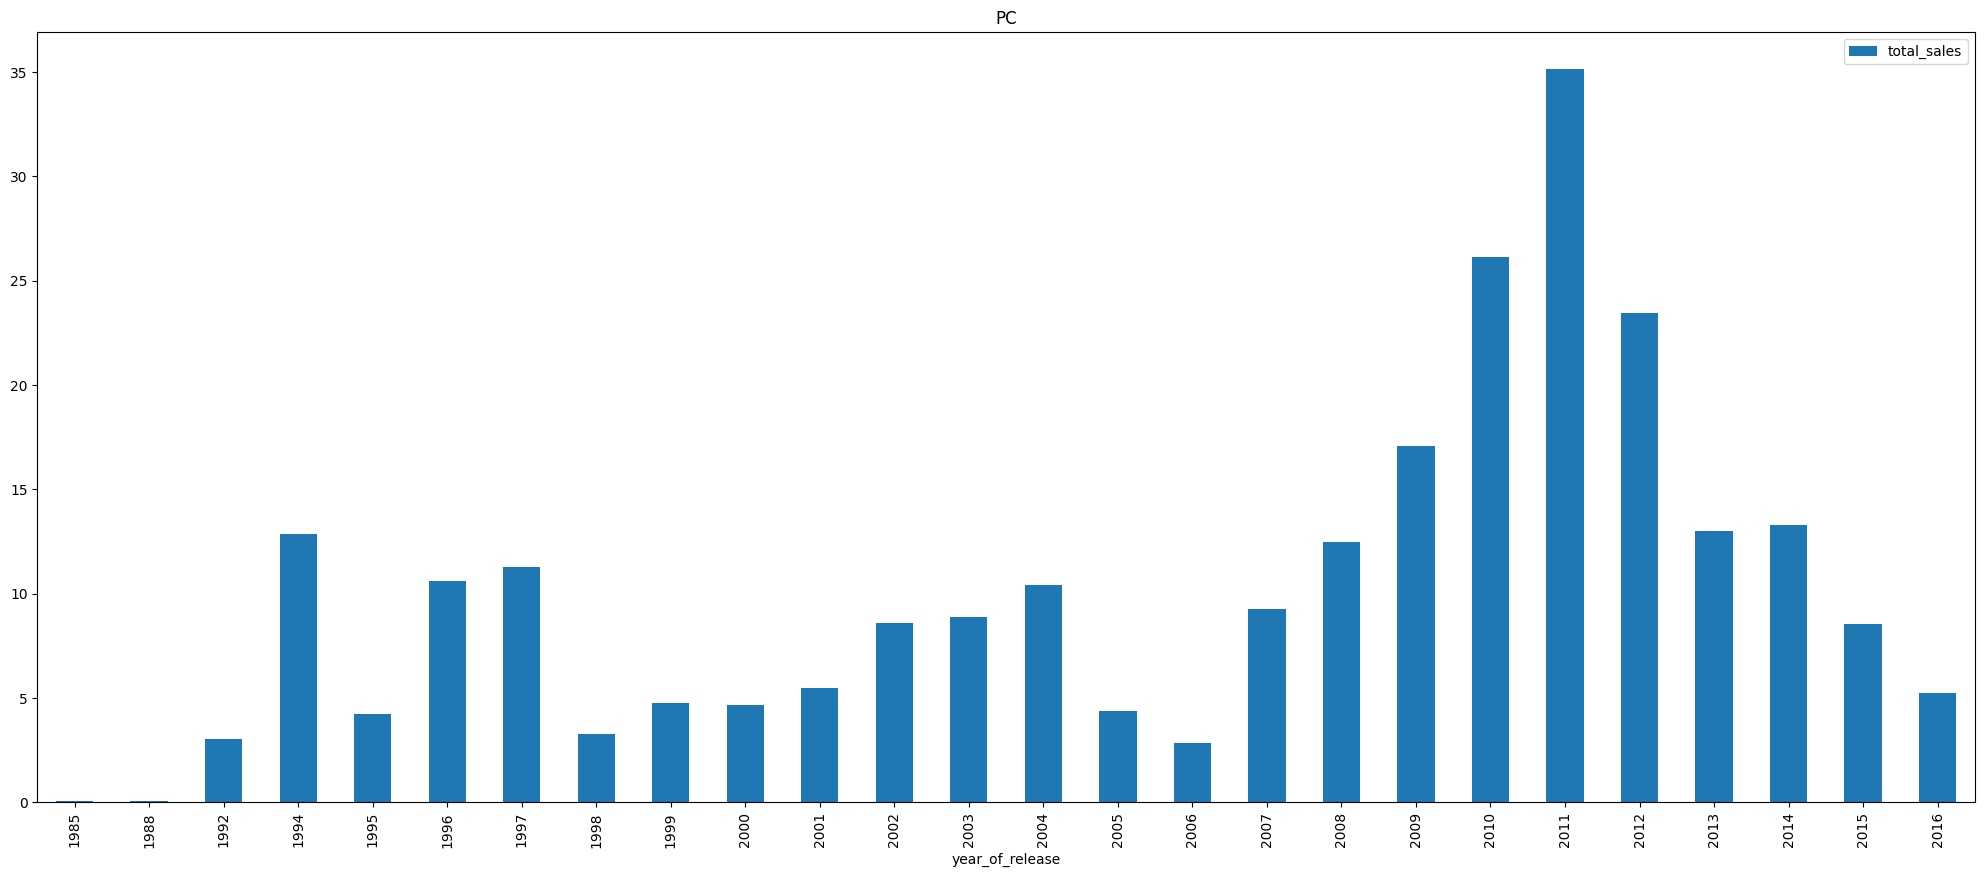

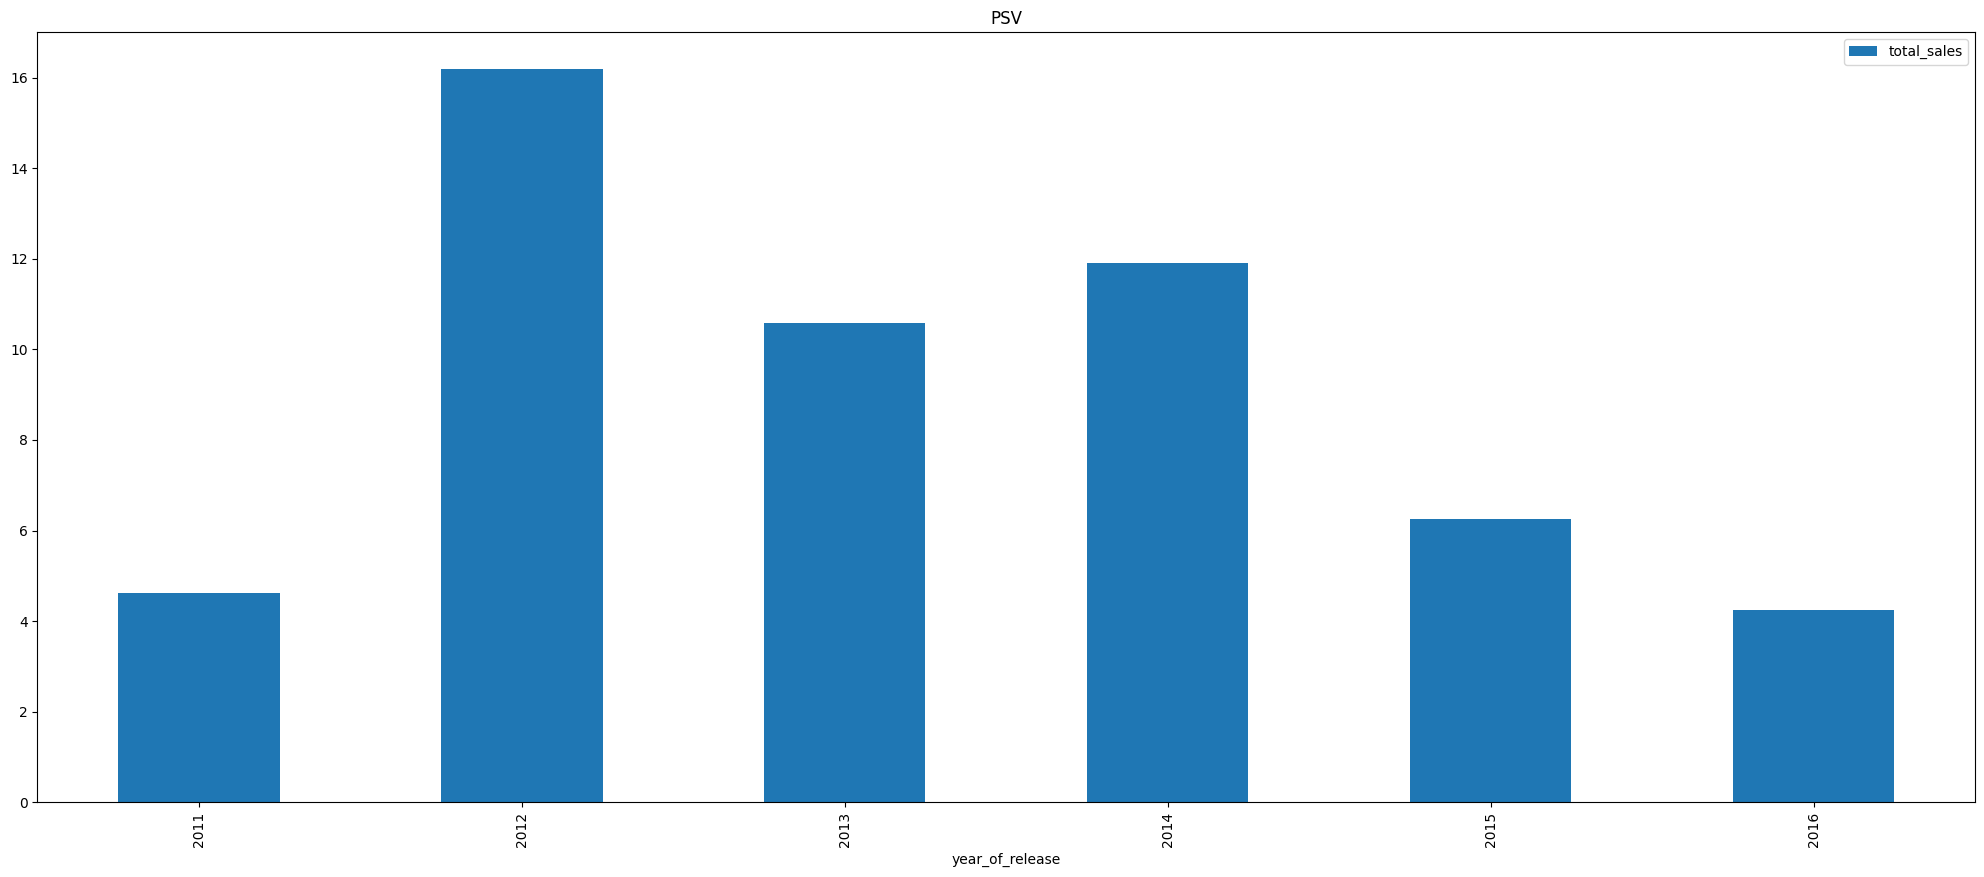

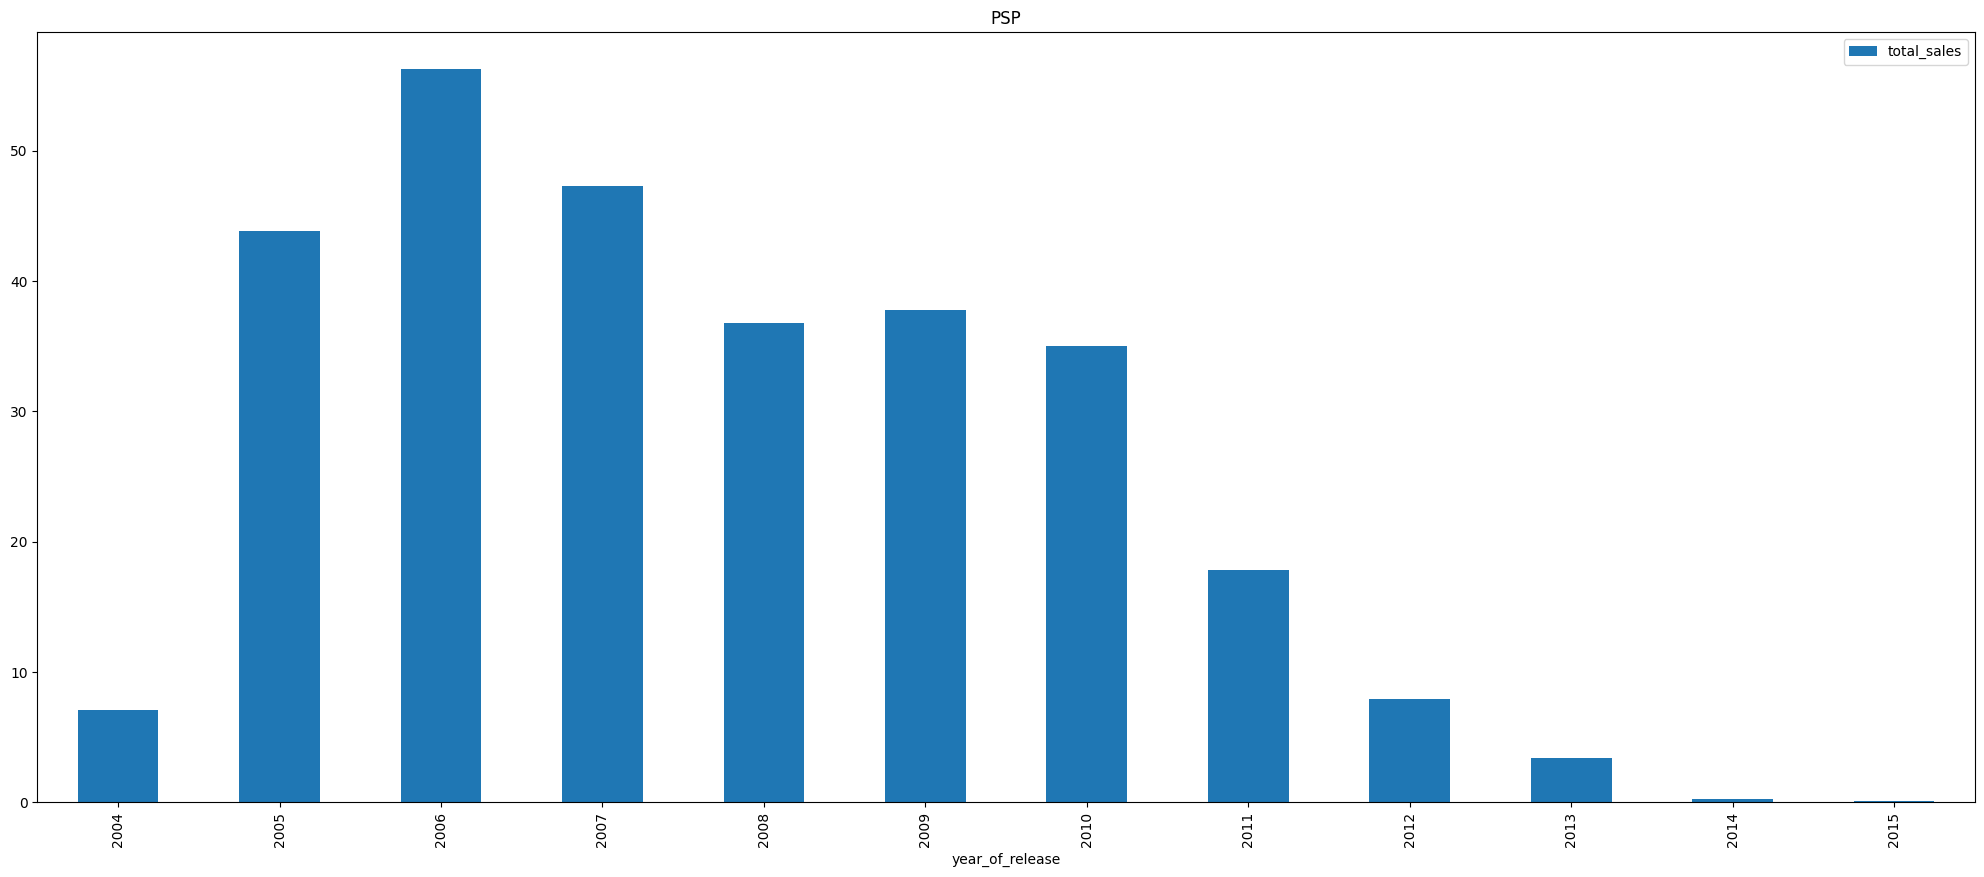

In [32]:
top_platforms_list_2016 = considered_period['platform'].unique()
for platform in top_platforms_list_2016:
    games[games['platform'] == platform]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(25,10))
    plt.title(platform)

Лидируют по продажам PS4, XOne, 3DS, X360, WiiU, PS, PSV. Однако все платформы показывают падение по продажам. \
Потенциально прибыльными платформами я бы посчитал PS4, XOne, PSV, и традиционно PC. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

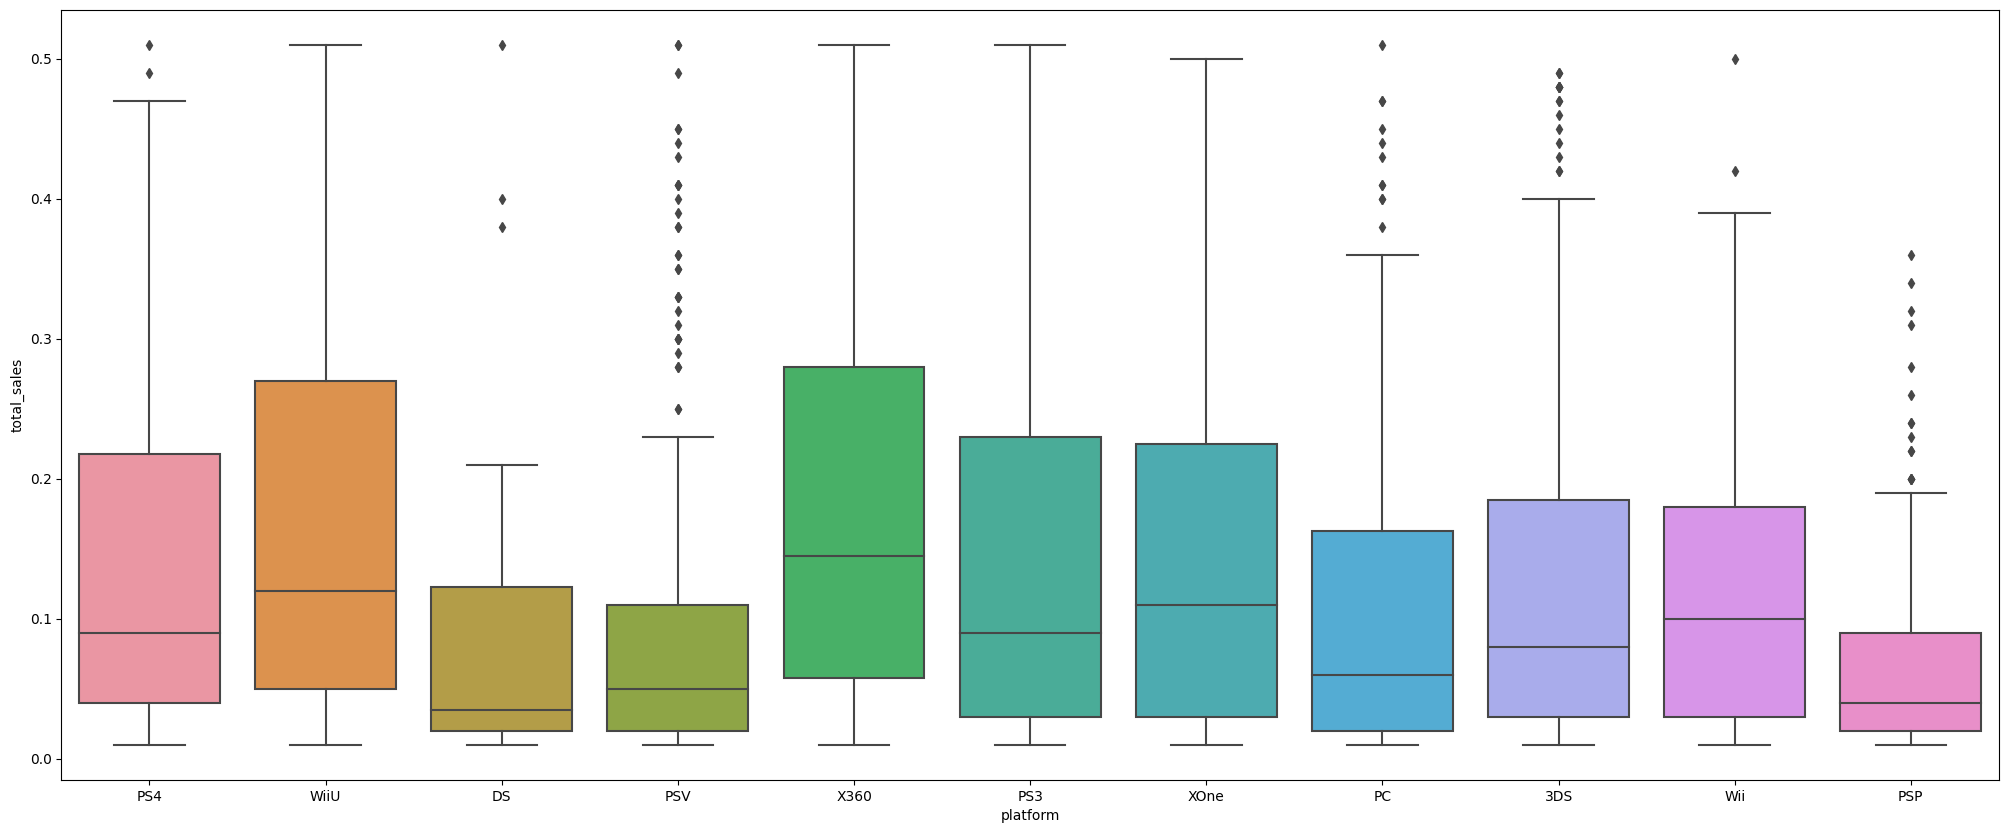

In [33]:
top_quantile = considered_period['total_sales'].quantile(0.75)
low_quantile = considered_period['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(25,10))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = considered_period.query('total_sales <= @threshold'),ax=ax)  
plt.show()

У платформ PS4, PS3 и Wii большая часть значений больше медианного. Наиболее равномерно распределены значения у платформы XOne, DS

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для примера возьмем PS4 как самую прибыльную платформу.

Посчитаем корреляцию между отзывами пользователей и критиков и продажами

In [34]:
# Корреляция между отзывами пользователей и продажами
PS4 = games[games['platform']=='PS4']
PS4['user_score'].corr(PS4['total_sales'])

-0.03195711020455643

In [35]:
# Корреляция между отзывами критиков и продажами
PS4 = games[games['platform']=='PS4']
PS4['critic_score'].corr(PS4['total_sales'])

0.4065679020617816

Построим диаграмму рассеяния. 

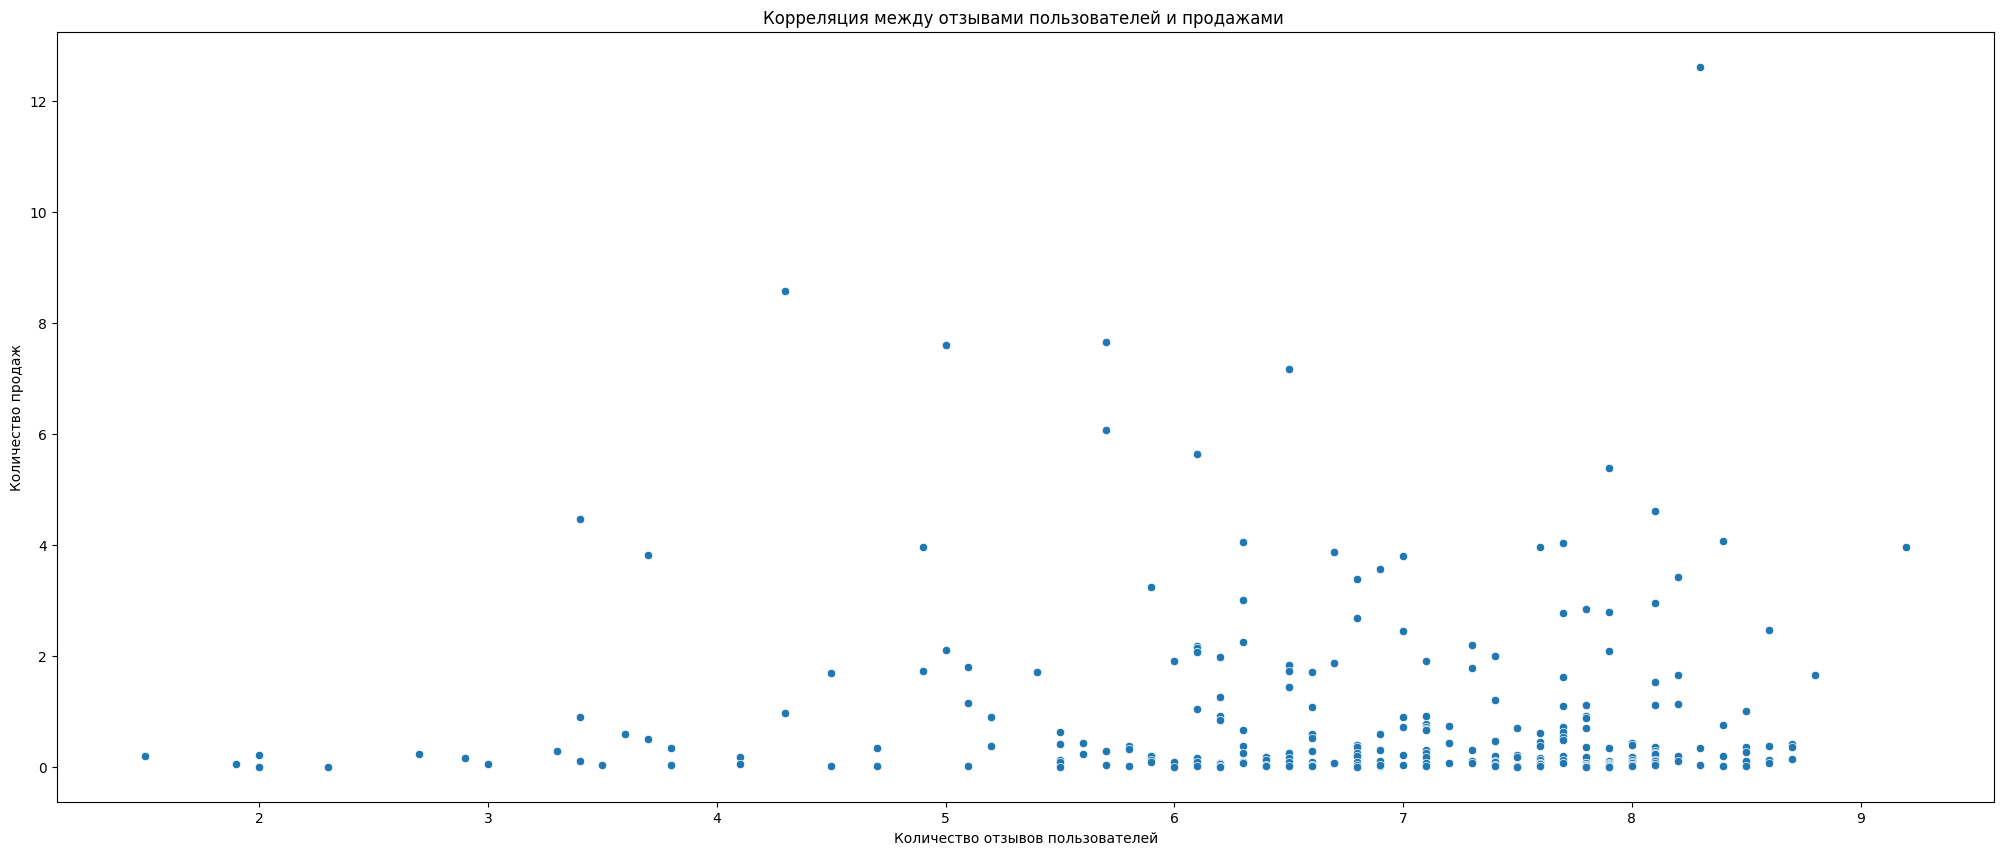

In [36]:
# Диаграмма рассеяния между отзывами пользователей и продажами
plt.figure(figsize=(25,10))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.title('Корреляция между отзывами пользователей и продажами ')
plt.xlabel('Количество отзывов пользователей')
plt.ylabel('Количество продаж')
plt.show()

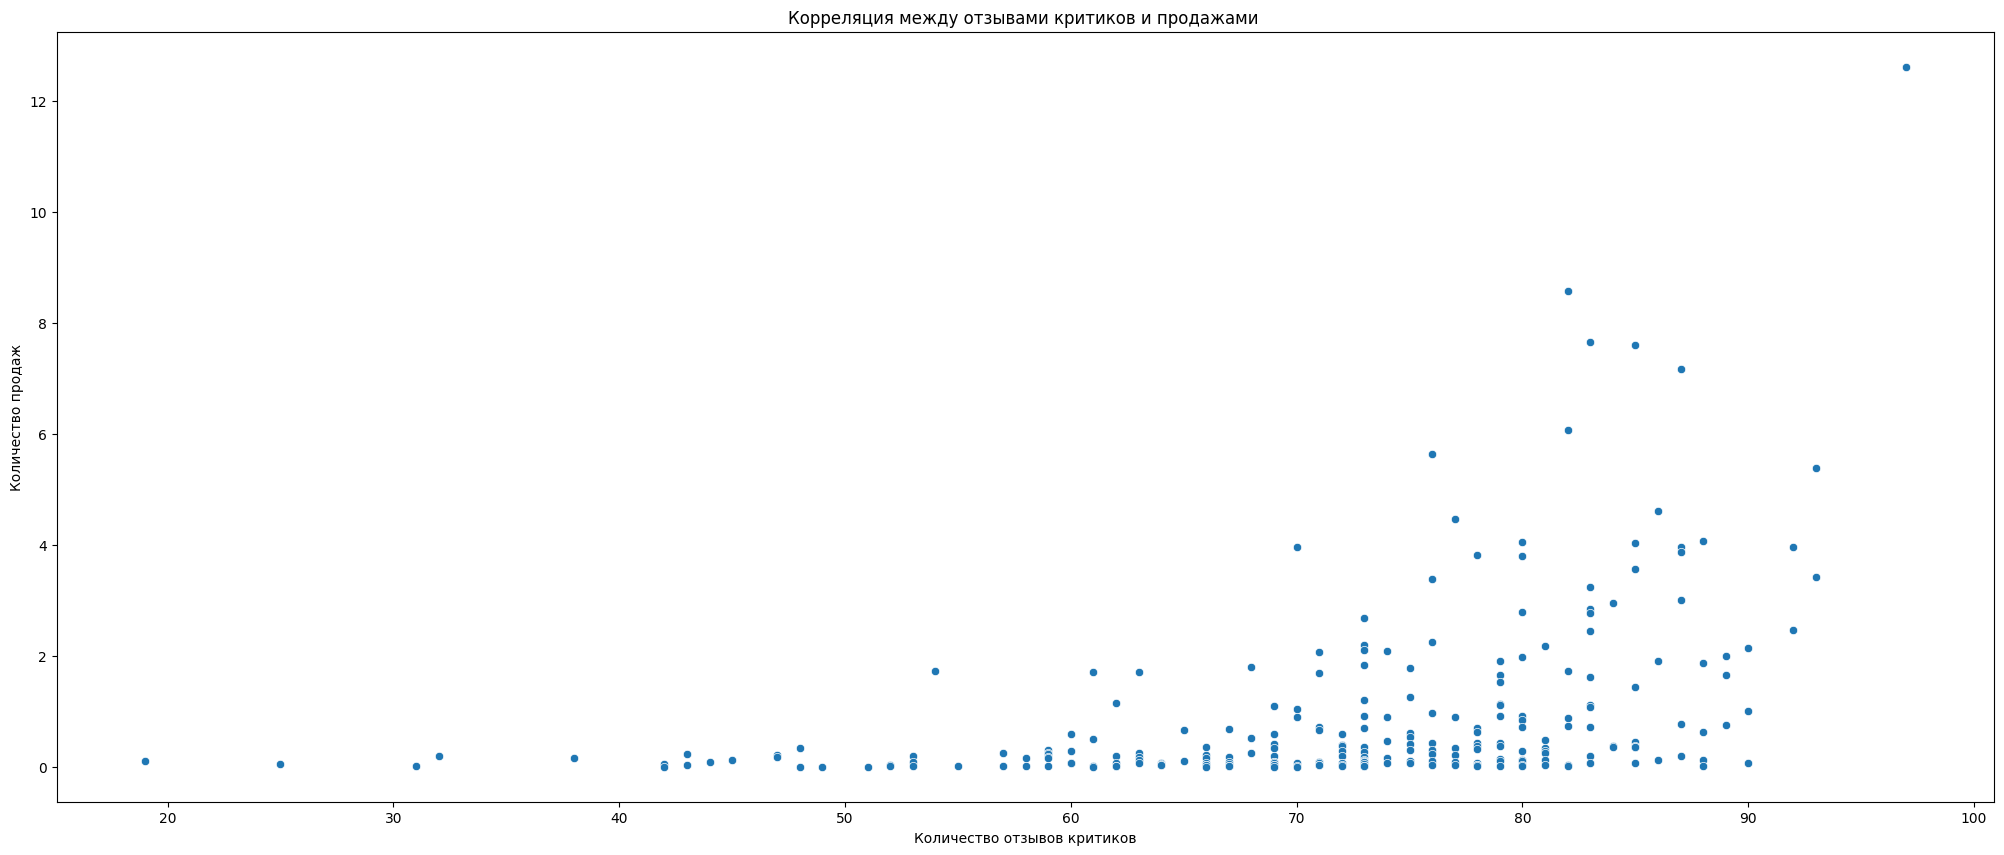

In [37]:
# Диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(25,10))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.title('Корреляция между отзывами критиков и продажами ')
plt.xlabel('Количество отзывов критиков')
plt.ylabel('Количество продаж')
plt.show()

Корреляция между отзывами пользователей и продажами не выявлена (-0.03)
Корреляция между отзывами критиков и продажами слабая (0.40)

Проверим корреляцию на других популярных платформах

In [38]:
for p in top_platforms_list_2016:
    print(p)
    corr_platform = games.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {corr_platform.critic_score.corr(corr_platform.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {corr_platform.user_score.corr(corr_platform.total_sales):.2}')
    print('--' * 30)

PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13
------------------------------------------------------------
X360
Корреляция между оценкой критиков и продажами: 0.39
Корреляция между оценкой пользователей и продажами: 0.11
------------------------------------------------------------
PS4
Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.032
------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.22
------------------------------------------------------------
DS
Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оценкой пользователей и продажами: 0.13
------------------------------------------------------------
XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой пользователей и продажами: -0.069
------------

Проверка на других платформах показала аналогичные результаты: отзывы пользователей не влияют на продажи, отзывы критиков влияют, но слабо. Отдельно я бы выделил платформу WiiU, которая показывает слабую связь отзывов пользователей и продаж. Это может быть связано с моделью распространения приставки, а также с тем фактом, что с начала старта продаж Wii U появилось немало негативных отзывов пользователей.

Посмотрим на общее распределение игр по жанрам.

In [39]:
gen_distr_mean = considered_period.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
gen_distr_mean.T


,0,1,2,3,4,5,6,7,8,9,10,11
genre,Shooter,Platform,Sports,Role-Playing,Racing,Misc,Simulation,Action,Fighting,Strategy,Puzzle,Adventure
total_sales,1.285865,0.717647,0.675634,0.521081,0.465217,0.441865,0.439,0.428828,0.408165,0.187887,0.174643,0.09745


In [40]:
gen_distr_median = considered_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
gen_distr_median.T

,0,1,2,3,4,5,6,7,8,9,10,11
genre,Shooter,Sports,Platform,Role-Playing,Racing,Fighting,Action,Misc,Simulation,Strategy,Puzzle,Adventure
total_sales,0.43,0.24,0.21,0.14,0.14,0.13,0.12,0.12,0.12,0.08,0.045,0.03


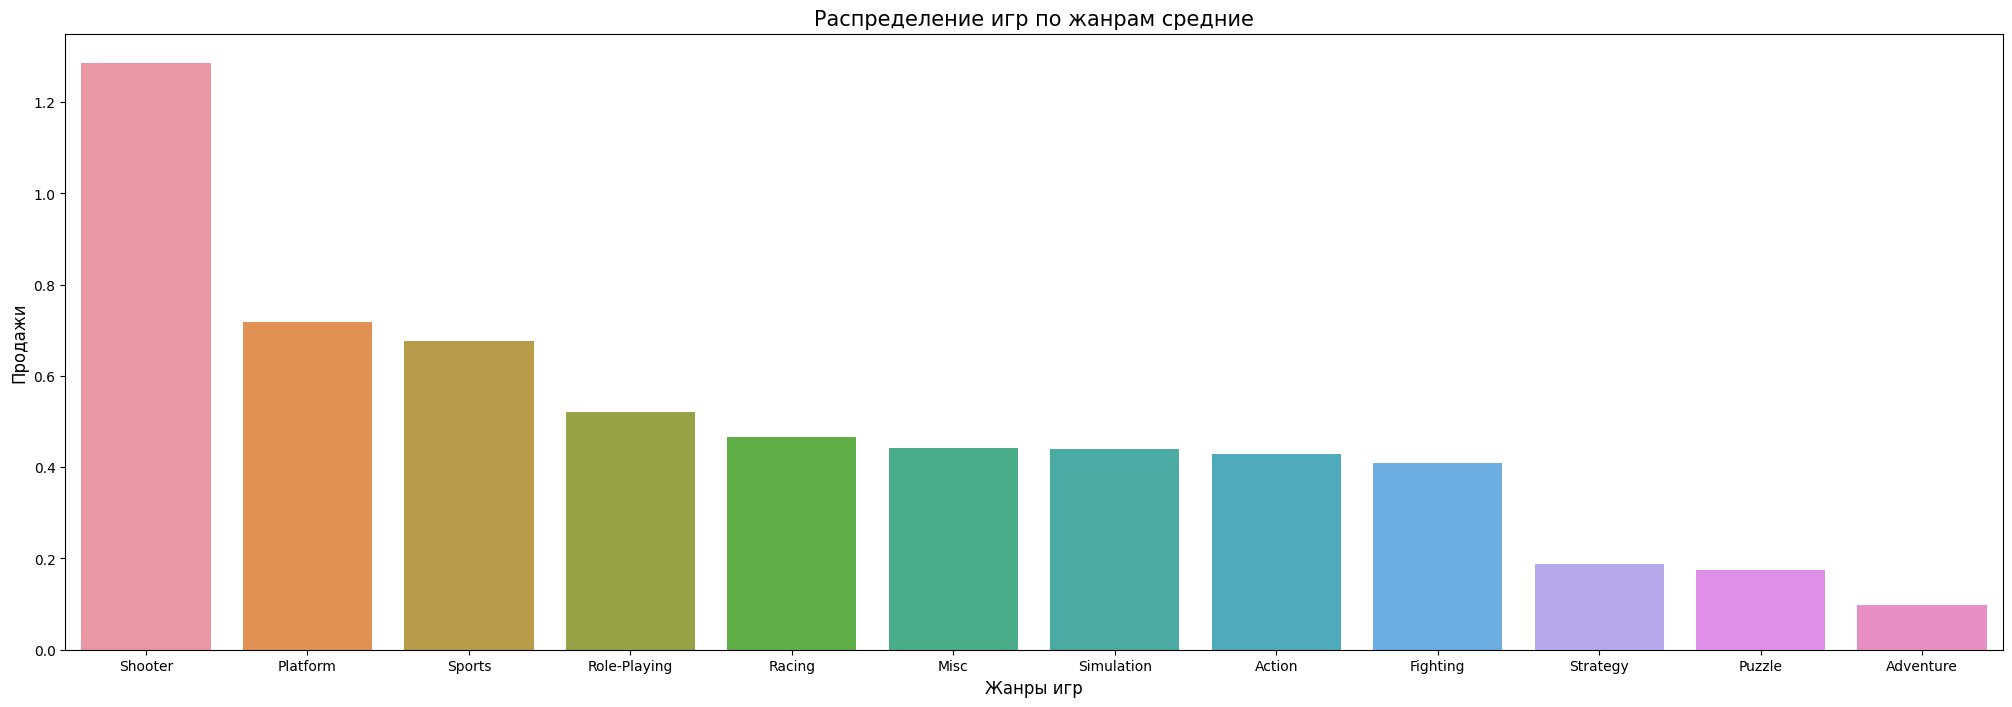

In [41]:
# Построим график для наглядности
plt.figure(figsize=(25,8))
plt.title('Распределение игр по жанрам средние',fontsize=15)
sns.barplot(data=gen_distr_mean, x='genre', y='total_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

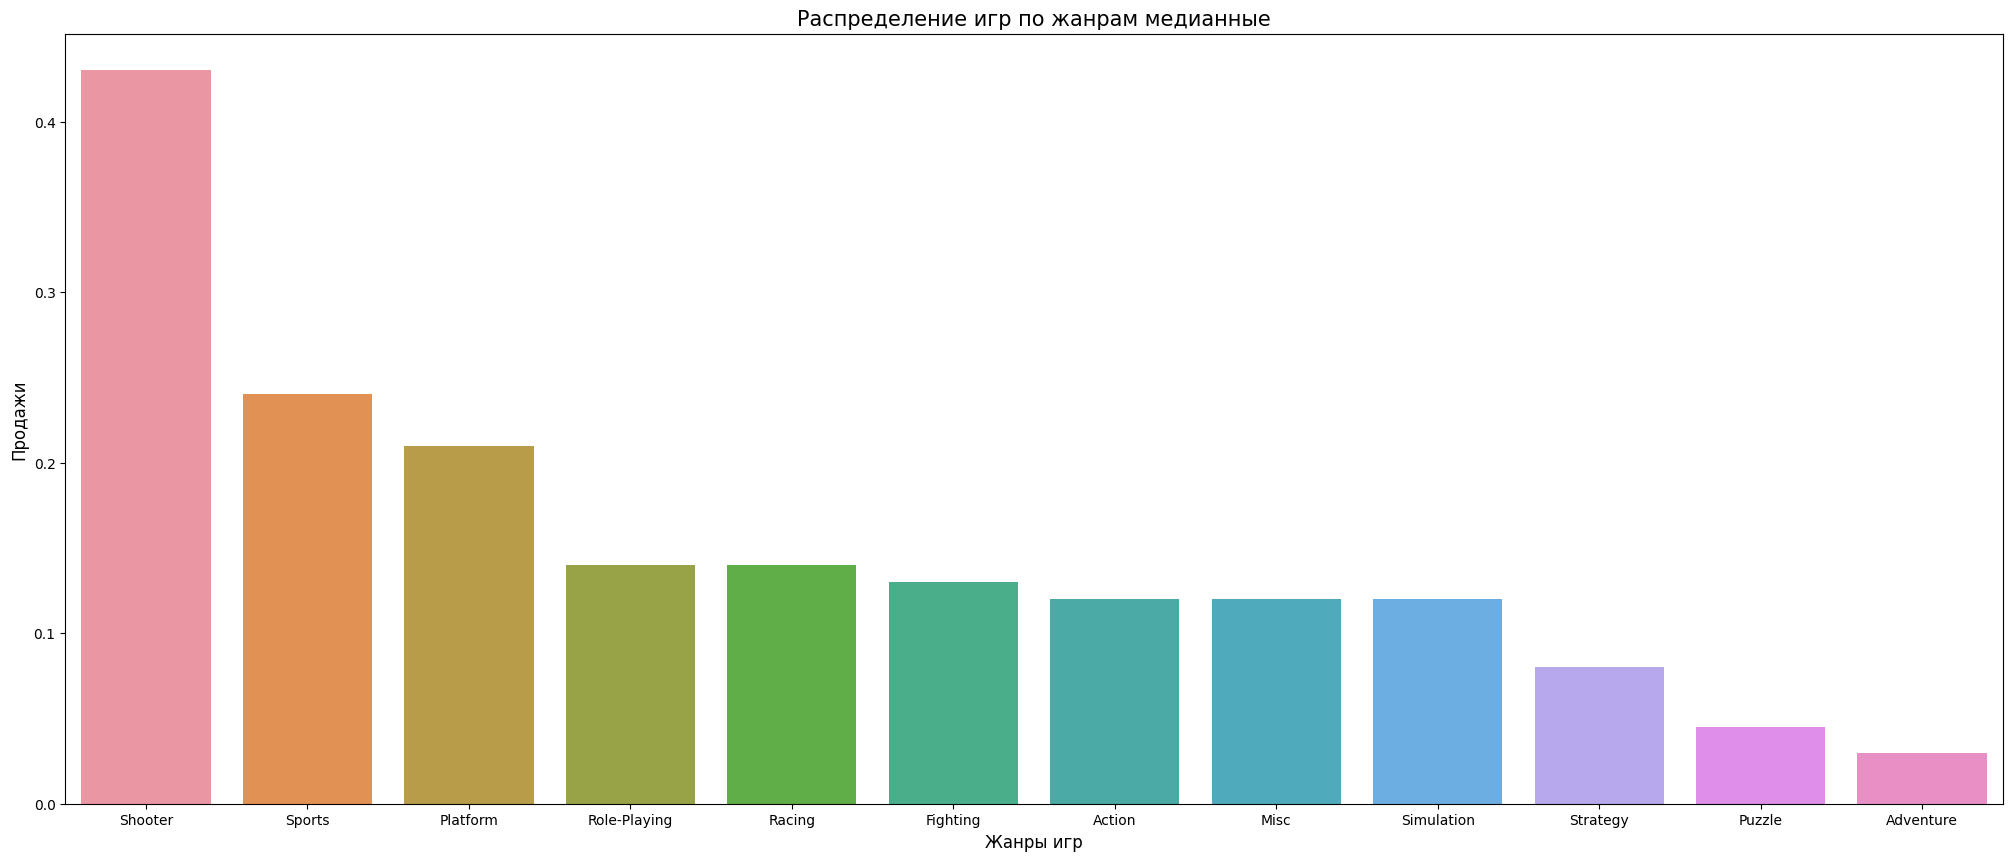

In [42]:
# Построим график для наглядности
plt.figure(figsize=(25,10))
plt.title('Распределение игр по жанрам медианные',fontsize=15)
sns.barplot(data=gen_distr_median, x='genre', y='total_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

Как мы видим, лидерами по общим продажам являются игры жанров Action и Shooter, аутсайдером - Puzzle. Очевидно, что игры, требующие усидчивости, менее популярны и, соответственно, менее прибыльны.

Однако средние и медианные значения показывают иное распределение.

Лидерами по прибыльности являются игры жанра Shooter, аутсайдером Adventure. 

В своих расчетах мы не учитываем стоимость разработки и продвижения игр, однако мы прогнозируем продажи  интернет-магазина «Стримчик», который не учавствует в разработке. 

## Составляем портрет пользователя каждого региона

Создадим функцию для создания графиков

In [43]:
# Функция для исследования всего периода наблюдений 
def top_in_regions_all(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

# Функция для исследования актуального периода наблюдений    
def top_in_regions_2016(groupby, region_sales, ax):
    pivot = considered_period.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)    

Самые популярные платформы (топ-5) за все время

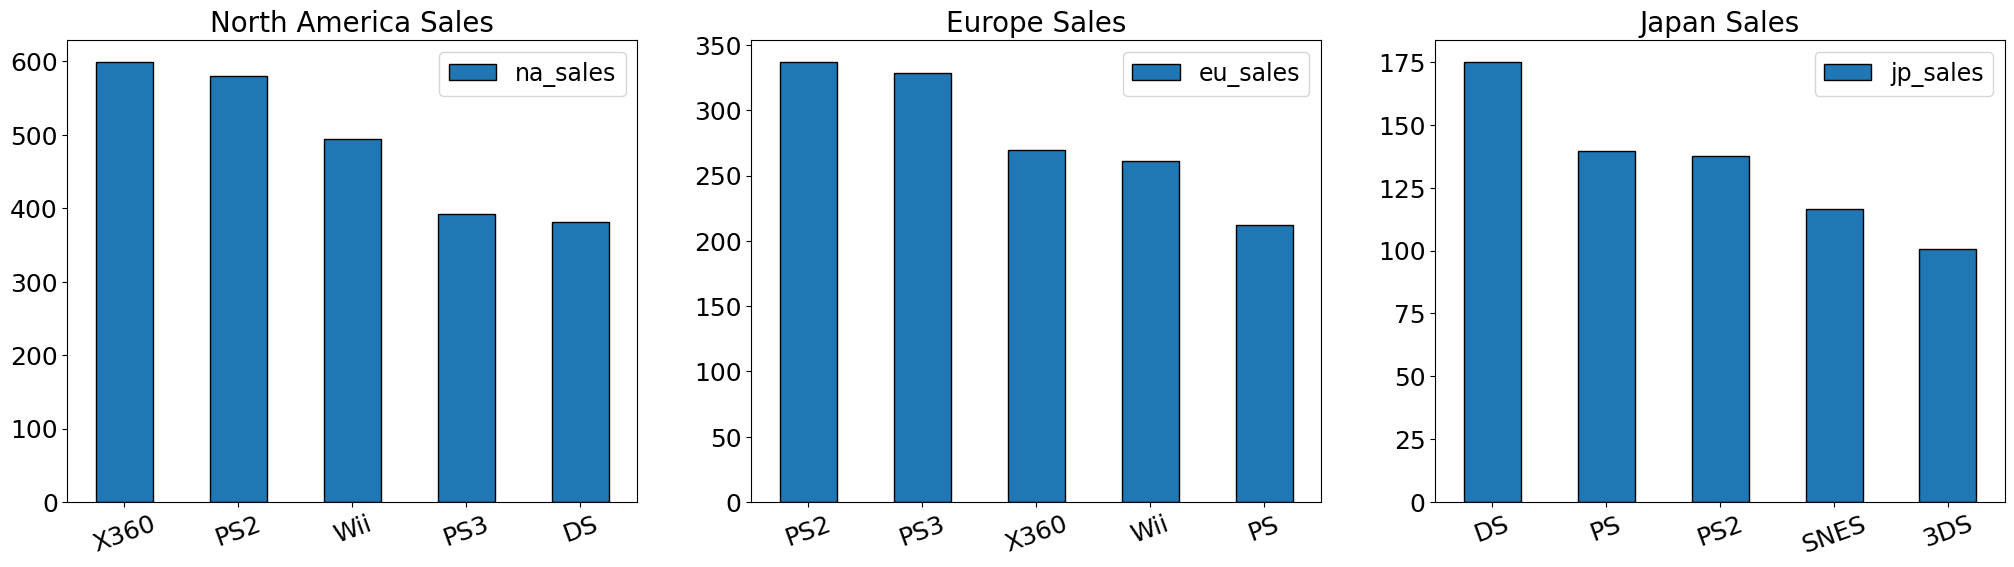

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_all('platform', 'na_sales', 0)
top_in_regions_all('platform', 'eu_sales', 1)
top_in_regions_all('platform', 'jp_sales', 2)

Пользователи Северной Америки любят приставки X360 и PS2. Немного отстает Wii. Топ-4 и топ-5 - PS3 и DS соответственно.
В Европе практически одинаково популярны PS2 и PS3. За ними X360, Wii и PS.
В Японии популярна японская приставка Nintendo DS. За ними американские PS и PS2. Далее опять японские SNES и 3DS.

Самые популярные платформы (топ-5) за актуальный период

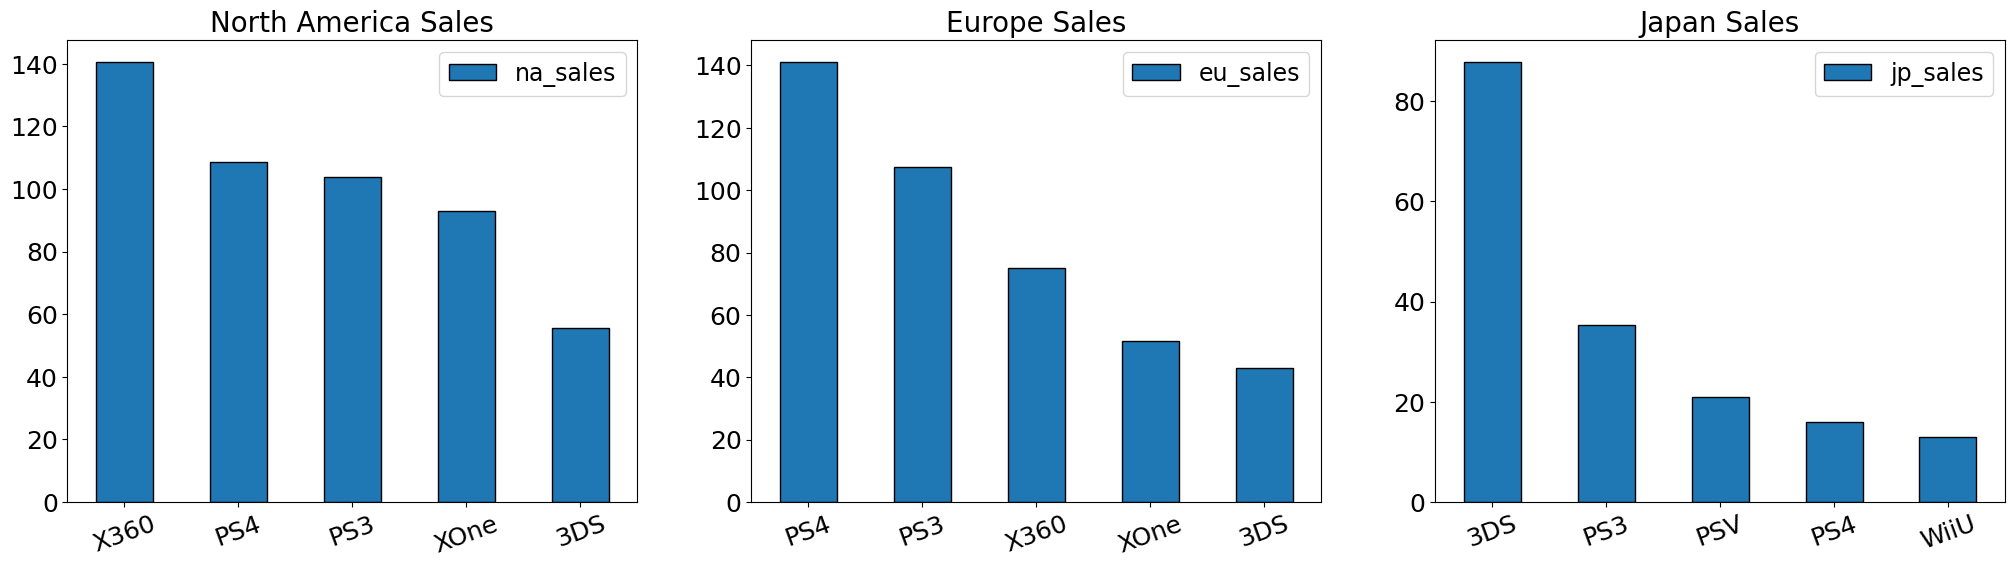

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_2016('platform', 'na_sales', 0)
top_in_regions_2016('platform', 'eu_sales', 1)
top_in_regions_2016('platform', 'jp_sales', 2)

Со временем предпочтения пользователей меняются. На первые роли выходят новые платформы: PlayStation4  для европы и Америки, и свежая Nintendo 3DS для Японии. Это вполне объяснимо: современные игры с современным геймплеем требуют больше ресурсов, новые процессоры и т.д.

Определяем разницу в долях продаж

In [46]:
top_platform = considered_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
top_platform.T

,0,1,2,3,4,5,6,7,8,9,10
platform,PS4,PS3,X360,3DS,XOne,WiiU,PC,PSV,Wii,DS,PSP
total_sales,314.14,289.71,237.52,195.01,159.32,82.19,63.51,49.18,36.6,13.21,11.69


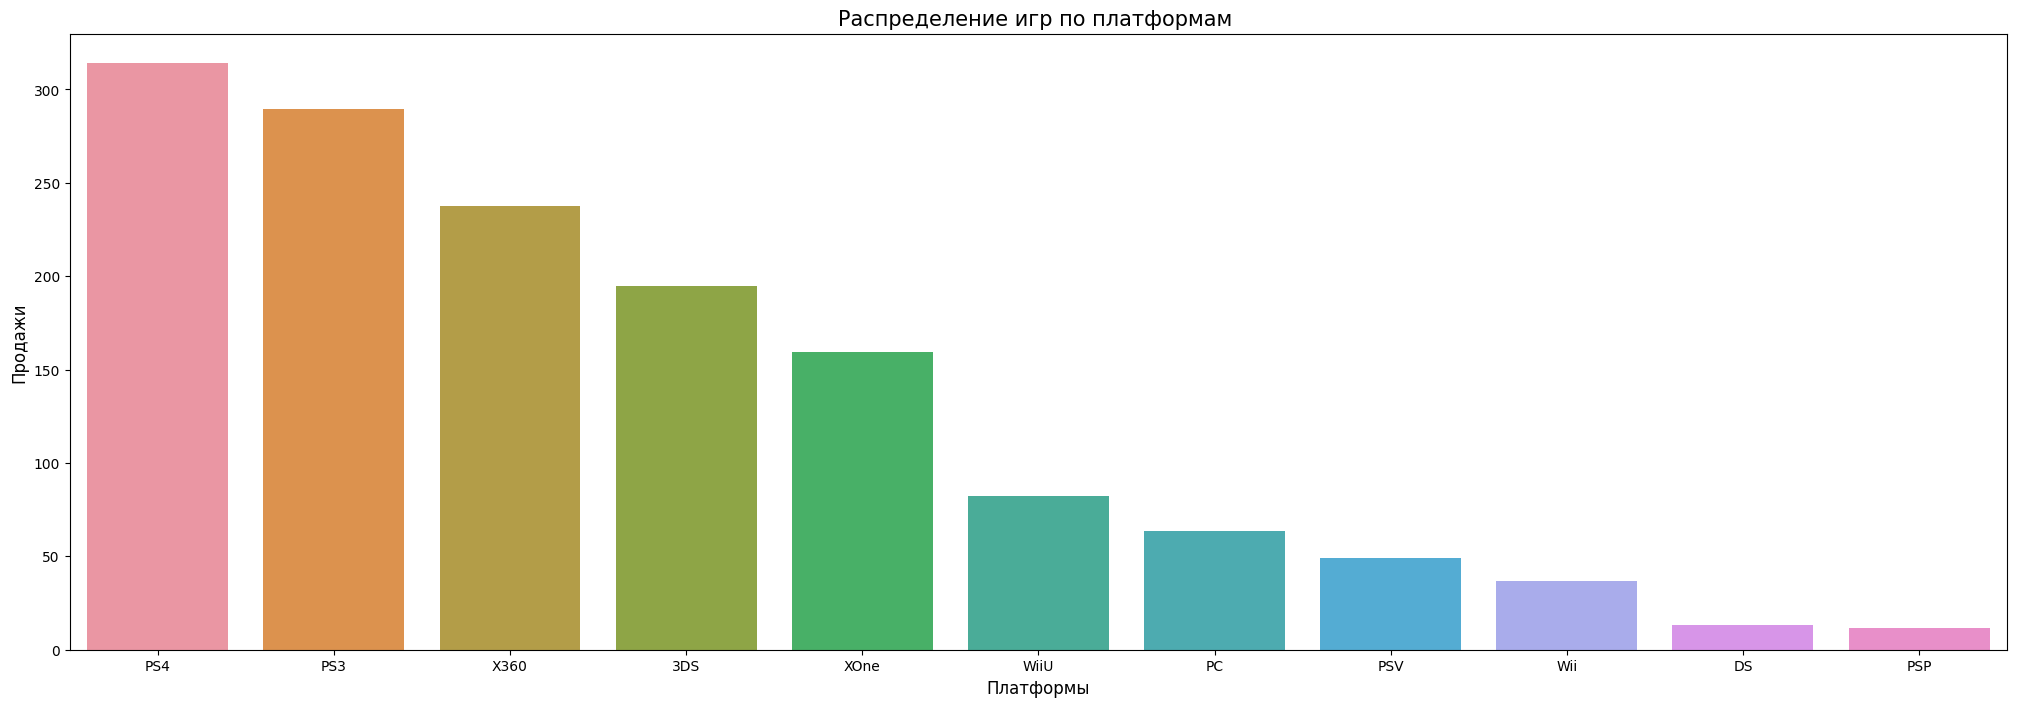

In [47]:
plt.figure(figsize=(25,8))
plt.title('Распределение игр по платформам ',fontsize=15)
sns.barplot(data=top_platform, x='platform', y='total_sales')
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

Мы видим тотальное преимущество Sony PlayStation 4 и 3 генерации, а также изделий Microsoft и Nintendo.

Самые популярные жанры (топ-5) для всего периода

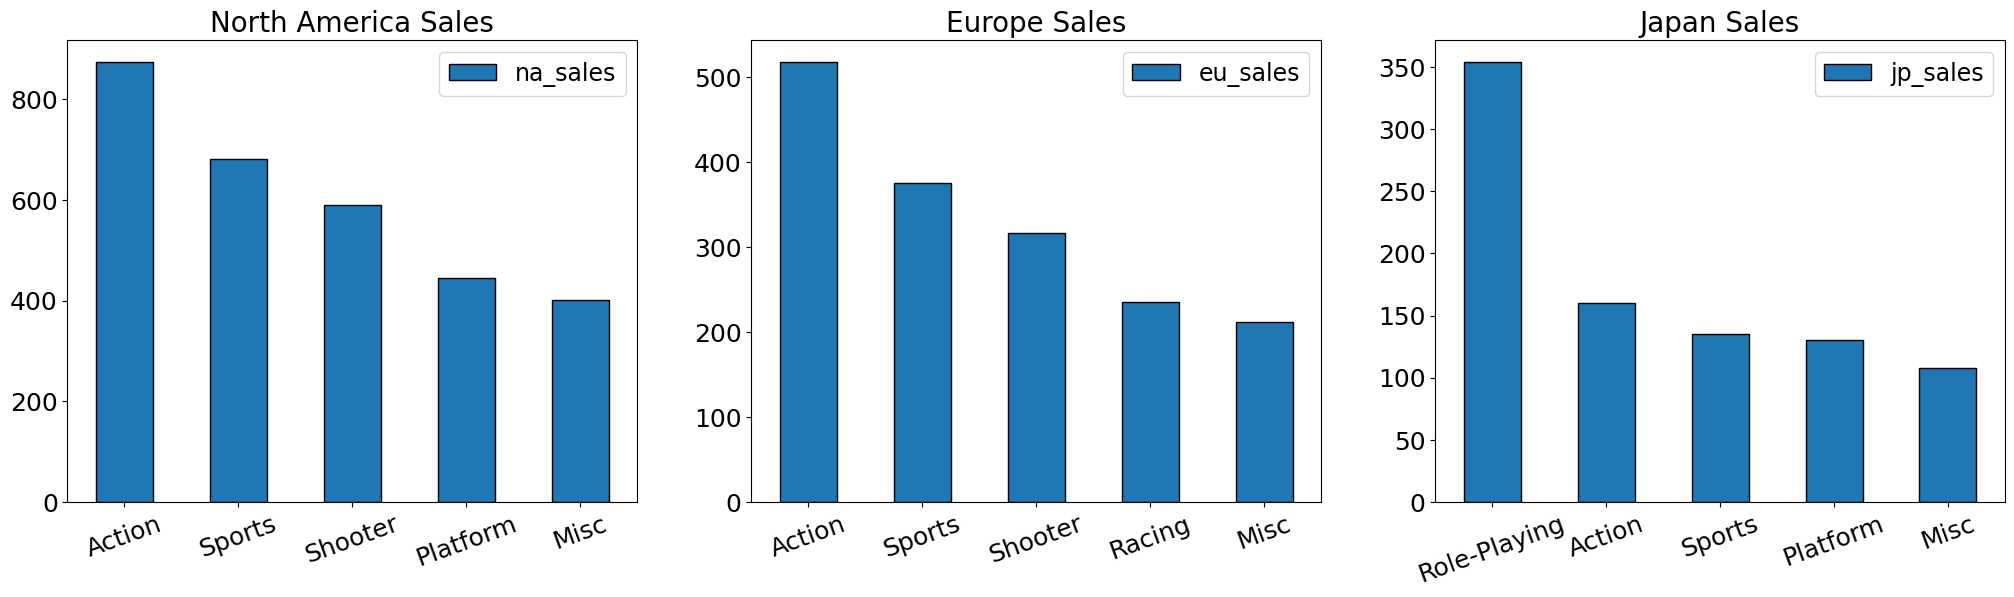

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_all('genre', 'na_sales', 0)
top_in_regions_all('genre', 'eu_sales', 1)
top_in_regions_all('genre', 'jp_sales', 2)

Европейцы и американцы отдают предпочтения играм в стиле Action, Shooter, Sports, Японцы больше любят ролевые игры. Разница менталитетов и отношения к жизни вообще налицо.

Самые популярные жанры (топ-5) для актуального периода

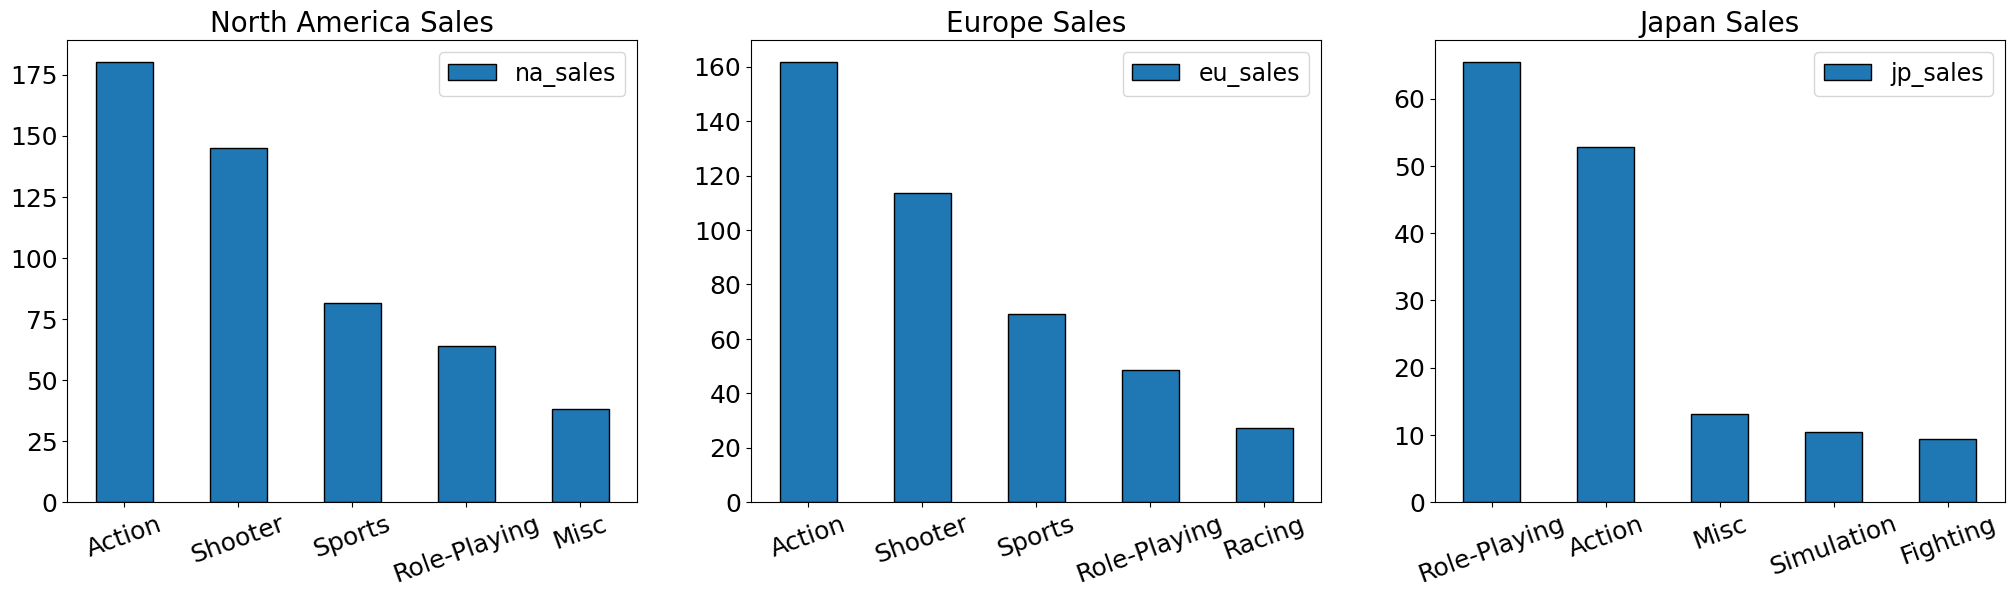

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_2016('genre', 'na_sales', 0)
top_in_regions_2016('genre', 'eu_sales', 1)
top_in_regions_2016('genre', 'jp_sales', 2)

Со временем предпочтения пользователей не меняются.

Влияение рейтинга ESRB на продажи в отдельном регионе за весь период

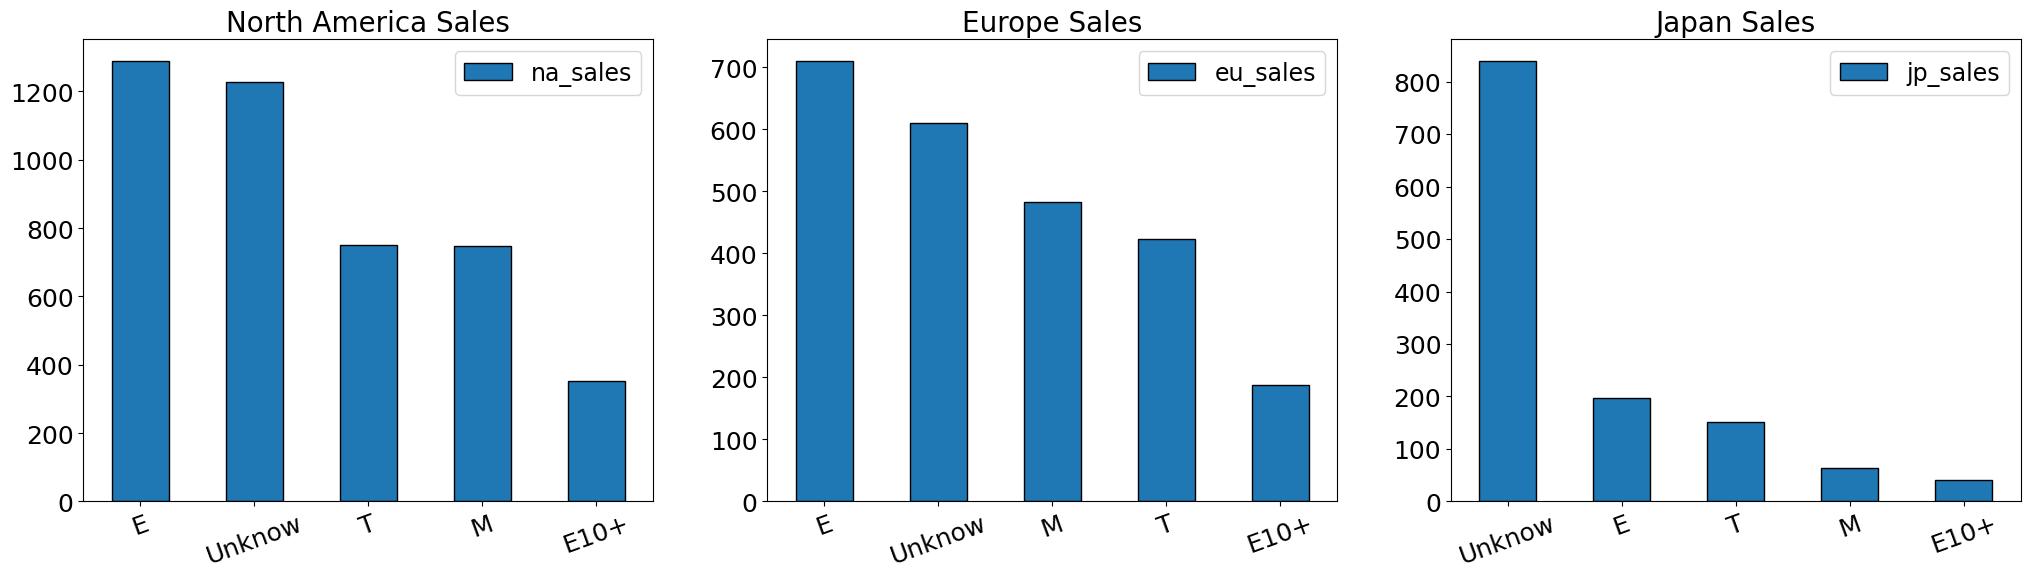

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_all('rating', 'na_sales', 0)
top_in_regions_all('rating', 'eu_sales', 1)
top_in_regions_all('rating', 'jp_sales', 2)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Во всех локациях за все время максимум продаж занимают игры с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

В Америке и Японии вторым по популярности является «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

Пользователи Европы больше любят «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови - занимает приблизительно одинаковую долю рынка во всех локациях.

Влияние рейтинга ESRB на продажи в отдельном регионе за актуальный период

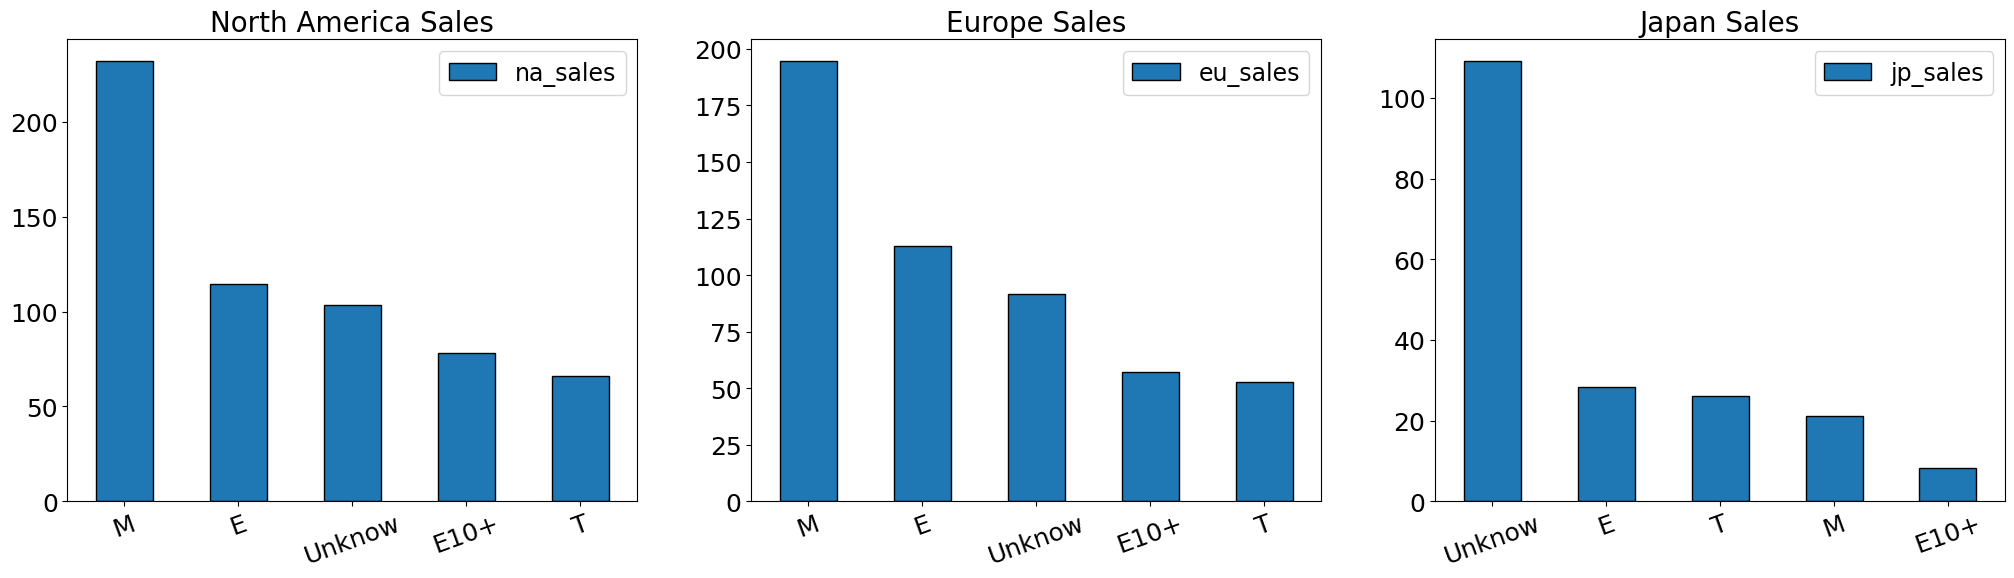

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_2016('rating', 'na_sales', 0)
top_in_regions_2016('rating', 'eu_sales', 1)
top_in_regions_2016('rating', 'jp_sales', 2)

В настоящее время большей популярностью в Европе и Америке стали пользоваться игры категории «M» («Mature») — «Для взрослых» и «E» («Everyone») — «Для всех». В Японии популярны игры «T» («Teen») — «Подросткам», «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых».

Высока доля игр без рейтинга. В Европе и Америке количество таких игр неуклонно снижается, что говорит о том, что производители стараются получить рейтинг.

В Японии игры без рейтинга занимают лидирующие позиции, т.к. ESRB не оценивает игры в Японии. 

## Проверяем гипотезы

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Создаем соответствующие выборки 

In [52]:
XOne_rating = games[(games['platform']=='XOne') & (games['year_of_release']>=2012)]['user_score']
PC_rating = games[(games['platform']=='PC') & (games['year_of_release']>=2012)]['user_score']

Проверяем гипотезу

In [53]:
alpha = .05

results = st.ttest_ind(
    XOne_rating.dropna(), 
    PC_rating.dropna()
)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 16%, хотя оценки пользователей и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

Создаем соответствующие выборки 

In [54]:
Action_rating = games[(games['genre']=='Action') & (games['year_of_release']>=2012)]['user_score']
Sports_rating = games[(games['genre']=='Sports') & (games['year_of_release']>=2012)]['user_score']

In [55]:
alpha = .05

results = st.ttest_ind(
    Action_rating.dropna(), 
    Sports_rating.dropna()
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


Вывод: Значение p-value показывает: вероятность случайно получить такое или большее различие очень мало, поэтому смело отвергаем нулевую гипотезу.

## Общий вывод

Провели исследование рынка компьютерных игр по 2016 год.

Подготовили данные для анализа.

При исследовании обнаружили взрывной рост количества игр в период с 1994 по 2008 год.

Далее количество игр плавно снижалось.

В 2008 году вышла платформа Android, в 2007 - iPhone OS. Стали бурно развиваться мобильные устройства. Увеличение производительности устройств, размера и качества экрана, развитие беспроводных технологий существенно сократило спрос на традиционные игровые приставки. Кроме того, программное обеспечение и характеристики персональных компьютеров обеспечило возможность запуска требовательных к ресурсам игр.

Однако в предложенном датасете нет статистики по мобильным платформам, поэтому прогноз на 2017 года будет несколько урезанным.\
Для прогнозирования ситуации я предполагаю взять за основу статистику за последние 4 года. 

Исходя из проанализированных данных, я бы порекомендовал сосредоточиться на развитии новых игровых приставок Sony PlayStation4, Nintendo 3DS, а также Microsoft Xbox и их более новых модификаций.

Я бы предложил рекламному отделу разделить регионы сбыта на Европа-Северная Америка и Япония, сосредоточится на продажах и игр на платформе Sony PlayStation4 и Microsoft Xbox в Европе и Северной Америке, и Nintendo 3DS в Японии.

Жанровое направление я бы порекомендовал Action и Shooter для Европы и Америки, Role-Playing для Японии. Однако следует иметь в виду, что разработка игр Action и Shooter более затратна как по времени, так и по привлекаемым ресурсам. При планировании бюджета необходимо это учесть.

Кроме того, растет популярность игр категорий M» («Mature») — «Для взрослых» и «E» («Everyone») — «Для всех».
       
Кроме того, при  планировании рекламных компаний необходимо учитывать мнение критиков и, в некоторых случаях, и мнение пользователей.

-------------------------------------------------------------------------------------------------------------------------------

Ну и если посмотреть данные, указанные в Википедии за 2017 год, то увидим, что наш прогноз был недалек от истины.
Наибольшее количество номинаций принесли игры в стиле Action и Shooter, а также игра Persona 5, являющаяся Role-Playing(кстати, она сначала вышла в Японии, а только потом в Европе и Америке).\
Источник: https://ru.wikipedia.org/wiki/The_Game_Awards_2017#%D0%9D%D0%B0%D0%B3%D1%80%D0%B0%D0%B4%D1%8B.